In [1]:
import ROOT
import sys
import math
from ROOT import gStyle
from ROOT import gPad
#from ROOT import gSystem


# NORMALIZATION
nPOT_MC1 = 135000
nPOT_CH1R1 = 136270
nPOT_CH1R2 = 110352
nPOT_CH1R3 = 107442
nPOT_CH1R4 = 76307
nPOT_CH1R5 = 73575
nPOT_CH1R6 = 38892

# BDT_CUT
bdt_cut = 0.05;
ntrk_cut = 4;
nprim_cut = 8;

vz_cut_CH1 = -36.82

# SHIFT DECAY LENGTH
dz_CH1 =  36.82; #35  # 34.525;
dz_CH2 = dz_CH1 + 36.82; #35; # 36.311;
dz_CH3 = dz_CH2 + 73.64; #65; # 66.162;
dz_CH4 = dz_CH3 + 73.64; #65; # 64.680;
dz_CH5 = dz_CH4 + 73.64; #65; # 64.680;
dz_CH6 = dz_CH5 + 73.64; #65; # 64.680;

vz_cut_max = -5;
cut_ntrks = 4;
vz_cut_half_brick = -36.82; #-35;
vz_cut_full_brick = -73.64; #-70;

# cut vz first t_eZ
#vz_cut_ch1 = -34.525
vz_cut_ch2 = -30.266
vz_cut_ch3 = -64.945
vz_cut_ch4 = -63.420
vz_cut_ch5 = -66.385
vz_cut_ch6 = -65.560


Welcome to JupyROOT 6.18/04


In [2]:
# BDT RESULTS

CH1_img1 = ROOT.TImage.Open("BDT_plots/CH1_input_var.png")
CH1_img2 = ROOT.TImage.Open("BDT_plots/CH1_coor_matrix_sig.png")
CH1_img3 = ROOT.TImage.Open("BDT_plots/CH1_coor_matrix_bkg.png")
CH1_img4 = ROOT.TImage.Open("BDT_plots/CH1_bdt_response.png")
CH1_img5 = ROOT.TImage.Open("BDT_plots/CH1_bdt_cut.png")
CH1_img6 = ROOT.TImage.Open("BDT_plots/CH1_roc.png")


RISULTATI BDT CH1


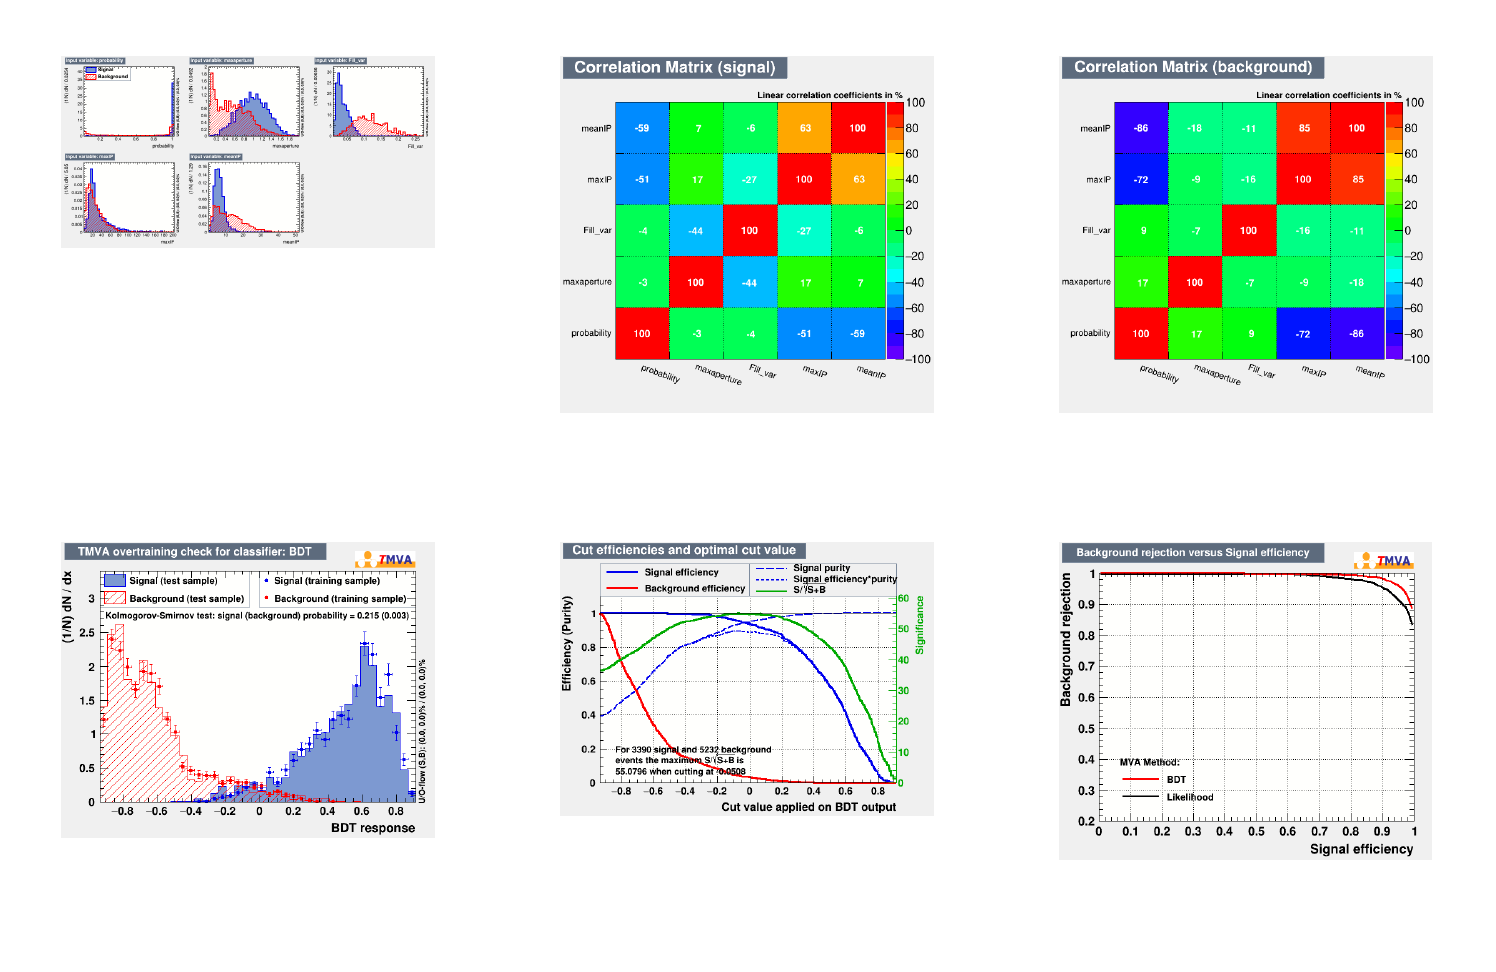

In [3]:
c0 = ROOT.TCanvas('c0','c0',1500,1000)
c0.Divide(3,2)
c0.cd(1)
CH1_img1.Draw()
c0.cd(2)
CH1_img2.Draw()
c0.cd(3)
CH1_img3.Draw()
c0.cd(4)
CH1_img4.Draw()
c0.cd(5)
CH1_img5.Draw()
c0.cd(6)
CH1_img6.Draw()
c0.Update()
print("RISULTATI BDT CH1")
c0.Draw()

In [4]:
print ("ANALISI CH1")

fMC1 = ROOT.TFile.Open("vtx_BDT_evaluated_MC_CH1_FULL.root")
hMC1_bdt= ROOT.TH1F('MC1_bdt','MC1_bdt',100,-1,1)
hMC1_bdt_tp= ROOT.TH1F('MC1_bdt_tp','MC1_bdt_tp',100,-1,1)
hMC1_bdt_pr= ROOT.TH1F('MC1_bdt_pr','MC1_bdt_pr',100,-1,1)
hMC1_bdt_hd= ROOT.TH1F('MC1_bdt_hd','MC1_bdt_hd',100,-1,1)
hMC1_bdt_var= ROOT.TH1F('MC1_bdt_var','MC1_bdt_var',100,0,0.5)
hMC1_bdt_var_tp= ROOT.TH1F('MC1_bdt_var_tp','MC1_bdt_var_tp',100,0,0.5)
hMC1_bdt_var_pr= ROOT.TH1F('MC1_bdt_var_pr','MC1_bdt_var_pr',100,0,0.5)
hMC1_bdt_var_hd= ROOT.TH1F('MC1_bdt_var_hd','MC1_bdt_var_hd',100,0,0.5)
hMC1_vz= ROOT.TH1F('MC1_vz','MC1_vz',15,-35,-5)
hMC1_vz_pr= ROOT.TH1F('MC1_vz_pr','MC1_vz_pr',15,-35,-5)
hMC1_vz_hd= ROOT.TH1F('MC1_vz_hd','MC1_vz_hd',15,-35,-5)
hMC1_vz_nobdt= ROOT.TH1F('MC1_vz_nobdt','MC1_vz_nobdt',15,-35,-5)
hMC1t_vz= ROOT.TH1F('MC1t_vz','MC1t_vz',15,-35,-5)
hMC1t_vz_pr= ROOT.TH1F('MC1t_vz_pr','MC1t_vz_pr',15,-35,-5)
hMC1t_vz_hd= ROOT.TH1F('MC1t_vz_hd','MC1t_vz_hd',15,-35,-5)
hMC1_n= ROOT.TH1F('MC1_n','MC1_n',35,0,70)
hMC1_n_nobdt= ROOT.TH1F('MC1_n_nobdt','MC1_n_nobdt',35,0,70)
hMC1t_n= ROOT.TH1F('MC1t_n','MC1t_n',35,0,70)
hMC1t_n_pr= ROOT.TH1F('MC1t_n_pr','MC1t_n_pr',35,0,70)
hMC1t_n_hd= ROOT.TH1F('MC1t_n_hd','MC1t_n_hd',35,0,70)
hMC1n_vz= ROOT.TH1F('MC1n_vz','MC1n_vz',15,-35,-5)
hMC1n_n= ROOT.TH1F('MC1n_n','MC1n_n',35,0,70)

hMC1_nev = ROOT.TH1F('MC1_nev','MC1_nev',10,0,10)
hMC1_nel = ROOT.TH1F('MC1_nel','MC1_nel',20,0,20)
hMC1_maxf = ROOT.TH1F('MC1_maxf','MC1_maxf',40,0,40)
hMC1_meanf = ROOT.TH1F('MC1_meanf','MC1_meanf',20,0,1)
hMC1t_nev = ROOT.TH1F('MC1t_nev','MC1t_nev',10,0,10)
hMC1t_nel = ROOT.TH1F('MC1t_nel','MC1t_nel',20,0,20)
hMC1t_maxf = ROOT.TH1F('MC1t_maxf','MC1t_maxf',40,0,40)
hMC1t_meanf = ROOT.TH1F('MC1t_meanf','MC1t_meanf',20,0,1)
hMC1t_nev_pr = ROOT.TH1F('MC1t_nev_pr','MC1t_nev_pr',10,0,10)
hMC1t_nel_pr = ROOT.TH1F('MC1t_nel_pr','MC1t_nel_pr',20,0,20)
hMC1t_maxf_pr = ROOT.TH1F('MC1t_maxf_pr','MC1t_maxf_pr',40,0,40)
hMC1t_meanf_pr = ROOT.TH1F('MC1t_meanf_pr','MC1t_meanf_pr',20,0,1)
hMC1t_nev_hd = ROOT.TH1F('MC1t_nev_hd','MC1t_nev_hd',10,0,10)
hMC1t_nel_hd = ROOT.TH1F('MC1t_nel_hd','MC1t_nel_hd',20,0,20)
hMC1t_maxf_hd = ROOT.TH1F('MC1t_maxf_hd','MC1t_maxf_hd',40,0,40)
hMC1t_meanf_hd = ROOT.TH1F('MC1t_meanf_hd','MC1t_meanf_hd',20,0,1)
hMC1_nev_cut = ROOT.TH1F('MC1_nev_cut','MC1_nev_cut',10,0,10)
hMC1_nel_cut = ROOT.TH1F('MC1_nel_cut','MC1_nel_cut',20,0,20)
hMC1_maxf_cut = ROOT.TH1F('MC1_maxf_cut','MC1_maxf_cut',40,0,40)
hMC1_meanf_cut = ROOT.TH1F('MC1_meanf_cut','MC1_meanf_cut',20,0,1)
hMC1_nev_cut_pr = ROOT.TH1F('MC1_nev_cut_pr','MC1_nev_cut_pr',10,0,10)
hMC1_nel_cut_pr = ROOT.TH1F('MC1_nel_cut_pr','MC1_nel_cut_pr',20,0,20)
hMC1_maxf_cut_pr = ROOT.TH1F('MC1_maxf_cut_pr','MC1_maxf_cut_pr',40,0,40)
hMC1_meanf_cut_pr = ROOT.TH1F('MC1_meanf_cut_pr','MC1_meanf_cut_pr',20,0,1)
hMC1_nev_cut_hd = ROOT.TH1F('MC1_nev_cut_hd','MC1_nev_cut_hd',10,0,10)
hMC1_nel_cut_hd = ROOT.TH1F('MC1_nel_cut_hd','MC1_nel_cut_hd',20,0,20)
hMC1_maxf_cut_hd = ROOT.TH1F('MC1_maxf_cut_hd','MC1_maxf_cut_hd',40,0,40)
hMC1_meanf_cut_hd = ROOT.TH1F('MC1_meanf_cut_hd','MC1_meanf_cut_hd',20,0,1)
#
hMC1_vz_dl= ROOT.TH1F('MC1_vz_dl','MC1_vz_dl',180,0,360)
hMC1_vz_dl_pr= ROOT.TH1F('MC1_vz_dl_pr','MC1_vz_dl_pr',180,0,360)
hMC1_vz_dl_hd= ROOT.TH1F('MC1_vz_dl_hd','MC1_vz_dl_hd',180,0,360)
hMC1_vz_dl_fp= ROOT.TH1F('MC1_vz_dl_fp','MC1_vz_dl_fp',180,0,360)
#
hMC1t_tx= ROOT.TH1F('MC1t_tx','MC1t_tx',100,-1,1)
hMC1t_ty= ROOT.TH1F('MC1t_ty','MC1t_ty',100,-1,1)
hMC1t_the= ROOT.TH1F('MC1t_the','MC1t_the',500,0,0.5)
hMC1t_logthe= ROOT.TH1F('MC1t_logthe','MC1t_logthe',60,-6,0)
hMC1t_nseg= ROOT.TH1F('MC1t_nseg','MC1t_nseg',30,0,30)
hMC1f_tx= ROOT.TH1F('MC1f_tx','MC1f_tx',100,-1,1)
hMC1f_ty= ROOT.TH1F('MC1f_ty','MC1f_ty',100,-1,1)
hMC1f_the= ROOT.TH1F('MC1f_the','MC1f_the',500,0,0.5)
hMC1f_logthe= ROOT.TH1F('MC1f_logthe','MC1f_logthe',60,-6,0)
hMC1f_nseg= ROOT.TH1F('MC1f_nseg','MC1f_nseg',30,0,30)

ANALISI CH1


In [5]:
for ev in fMC1.bdt :
    if ev.ntracks>=ntrk_cut: 
        hMC1_bdt.Fill(ev.bdt_value)
        hMC1_bdt_var.Fill((1-ev.bdt_value)/ev.ntracks)
        hMC1_nev.Fill(ev.nevents);
        hMC1_nel.Fill(ev.nelectrons);
        hMC1_maxf.Fill(ev.maxfreq);
        hMC1_meanf.Fill(ev.meanfreq);
        # DA MODIFICARE IN TUTTE LE CONFIGURAZIONI CON TAGLIO NUOVO
        if (((ev.ntracks-ev.nelectrons)>=8 or (ev.mp_motherID==0 and ev.ntracks>=8)) and ev.maxfreq!=1 and 
            (ev.ntracks-ev.nevents+1)>=8 and ((ev.ntracks-ev.maxfreq)/ev.maxfreq<0.75 or ev.ntracks>10)):
            hMC1t_nel.Fill(ev.nelectrons);
            hMC1t_maxf.Fill(ev.maxfreq);
            hMC1t_meanf.Fill(ev.meanfreq);
            hMC1_bdt_tp.Fill(ev.bdt_value)
            hMC1_bdt_var_tp.Fill((1-ev.bdt_value)/ev.ntracks)
            if ev.mp_motherID==0: 
                hMC1_bdt_pr.Fill(ev.bdt_value)
                hMC1_bdt_var_pr.Fill((1-ev.bdt_value)/ev.ntracks)
                hMC1t_nev_pr.Fill(ev.nevents);
                hMC1t_nel_pr.Fill(ev.nelectrons);
                hMC1t_maxf_pr.Fill(ev.maxfreq);
                hMC1t_meanf_pr.Fill(ev.meanfreq);
            else:
                hMC1_bdt_hd.Fill(ev.bdt_value)
                hMC1_bdt_var_hd.Fill((1-ev.bdt_value)/ev.ntracks)
                hMC1t_nev_hd.Fill(ev.nevents);
                hMC1t_nel_hd.Fill(ev.nelectrons);
                hMC1t_maxf_hd.Fill(ev.maxfreq);
                hMC1t_meanf_hd.Fill(ev.meanfreq);
    if ev.ntracks > cut_ntrks and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1:
        hMC1_vz_nobdt.Fill(ev.vz/1000.)
        hMC1_n_nobdt.Fill(ev.ntracks)
    if (1-ev.bdt_value)/ev.ntracks < bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1: 
        hMC1_vz.Fill(ev.vz/1000.)
        if ev.mp_motherID==0:
            hMC1_vz_pr.Fill(ev.vz/1000.)
        else:
            hMC1_vz_hd.Fill(ev.vz/1000.)
        hMC1_vz_dl.Fill(ev.vz/1000. + dz_CH1)
        hMC1_n.Fill(ev.ntracks)
        hMC1_nev_cut.Fill(ev.nevents);
        hMC1_nel_cut.Fill(ev.nelectrons);
        hMC1_maxf_cut.Fill(ev.maxfreq);
        hMC1_meanf_cut.Fill(ev.meanfreq);
        for i in range(ev.ntracks):
                hMC1t_tx.Fill(ev.t_eTX[i])
                hMC1t_ty.Fill(ev.t_eTY[i])
                hMC1t_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hMC1t_the.Fill(theta)
                hMC1t_logthe.Fill(logthe)  
        if (((ev.ntracks-ev.nelectrons)>=8 or (ev.mp_motherID==0 and ev.ntracks>=8)) and ev.maxfreq!=1 and 
            (ev.ntracks-ev.nevents+1)>=8 and ((ev.ntracks-ev.maxfreq)/ev.maxfreq<0.75 or ev.ntracks>10)):
            hMC1t_vz.Fill(ev.vz/1000.)
            hMC1t_n.Fill(ev.ntracks)       
            if ev.mp_motherID==0:
                hMC1t_vz_pr.Fill(ev.vz/1000.)
                hMC1_vz_dl_pr.Fill(ev.vz/1000. + dz_CH1)
                hMC1t_n_pr.Fill(ev.ntracks)
                hMC1_nev_cut_pr.Fill(ev.nevents);
                hMC1_nel_cut_pr.Fill(ev.nelectrons);
                hMC1_maxf_cut_pr.Fill(ev.maxfreq);
                hMC1_meanf_cut_pr.Fill(ev.meanfreq);
            else: 
                hMC1t_vz_hd.Fill(ev.vz/1000.)
                hMC1_vz_dl_hd.Fill(ev.vz/1000. + dz_CH1)
                hMC1t_n_hd.Fill(ev.ntracks)
                hMC1_nev_cut_hd.Fill(ev.nevents);
                hMC1_nel_cut_hd.Fill(ev.nelectrons);
                hMC1_maxf_cut_hd.Fill(ev.maxfreq);
                hMC1_meanf_cut_hd.Fill(ev.meanfreq);
        if not (((ev.ntracks-ev.nelectrons)>=8 or (ev.mp_motherID==0 and ev.ntracks>=8)) and ev.maxfreq!=1 and 
            (ev.ntracks-ev.nevents+1)>=8 and ((ev.ntracks-ev.maxfreq)/ev.maxfreq<0.75 or ev.ntracks>10)):
            hMC1n_vz.Fill(ev.vz/1000.)
            hMC1_vz_dl_fp.Fill(ev.vz/1000. + dz_CH1)
            hMC1n_n.Fill(ev.ntracks)
    if (1-ev.bdt_value)/ev.ntracks > bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1:
        for i in range(ev.ntracks):
                hMC1f_tx.Fill(ev.t_eTX[i])
                hMC1f_ty.Fill(ev.t_eTY[i])
                hMC1f_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hMC1f_the.Fill(theta)
                hMC1f_logthe.Fill(logthe) 

# to simulate the full run 
"""
hMC1_bdt.Scale(4)
hMC1_bdt_tp.Scale(4)
hMC1_bdt_pr.Scale(4)
hMC1_bdt_hd.Scale(4)
hMC1_bdt_var.Scale(4)
hMC1_bdt_var_tp.Scale(4)
hMC1_bdt_var_pr.Scale(4)
hMC1_bdt_var_hd.Scale(4)
hMC1_vz.Scale(4)
hMC1_vz_nobdt.Scale(4)
hMC1t_vz.Scale(4)
hMC1n_vz.Scale(4)
hMC1t_vz_pr.Scale(4)
hMC1t_vz_hd.Scale(4)
hMC1_n.Scale(4)
hMC1_n_nobdt.Scale(4)
hMC1t_n.Scale(4)
hMC1n_n.Scale(4)
hMC1t_n_pr.Scale(4)
hMC1t_n_hd.Scale(4)

hMC1_vz_dl.Scale(4)
hMC1_vz_dl_pr.Scale(4)
hMC1_vz_dl_hd.Scale(4)
hMC1_vz_dl_fp.Scale(4)
"""
hMC1_vz_dl.SaveAs("MC1_vz_dl.root")
hMC1_vz_dl_pr.SaveAs("MC1_vz_dl_pr.root")
hMC1_vz_dl_hd.SaveAs("MC1_vz_dl_hd.root")
hMC1_vz_dl_fp.SaveAs("MC1_vz_dl_fp.root")

Error in <TFile::TFile>: file tmva_input_vertices.root does not exist
Info in <TH1F::SaveAs>: ROOT file MC1_vz_dl.root has been created
Info in <TH1F::SaveAs>: ROOT file MC1_vz_dl_pr.root has been created
Info in <TH1F::SaveAs>: ROOT file MC1_vz_dl_hd.root has been created
Info in <TH1F::SaveAs>: ROOT file MC1_vz_dl_fp.root has been created


In [6]:
#PRINT       DA MODIFICARE TAGLIO NUOVO
CH1_nprotons = hMC1_nev_cut_pr.GetEntries()/hMC1_nev_cut.GetEntries()
CH1_nhadrons = hMC1_nev_cut_hd.GetEntries()/hMC1_nev_cut.GetEntries()
CH1_badsel = 1-CH1_nprotons-CH1_nhadrons
print("CH1_nprotons ",CH1_nprotons*100)
print("CH1_nhadrons ",CH1_nhadrons*100)
print("CH1_badsel ",CH1_badsel*100)

CH1_nprotons  88.9636797083158
CH1_nhadrons  10.103772261954845
CH1_badsel  0.9325480297293534


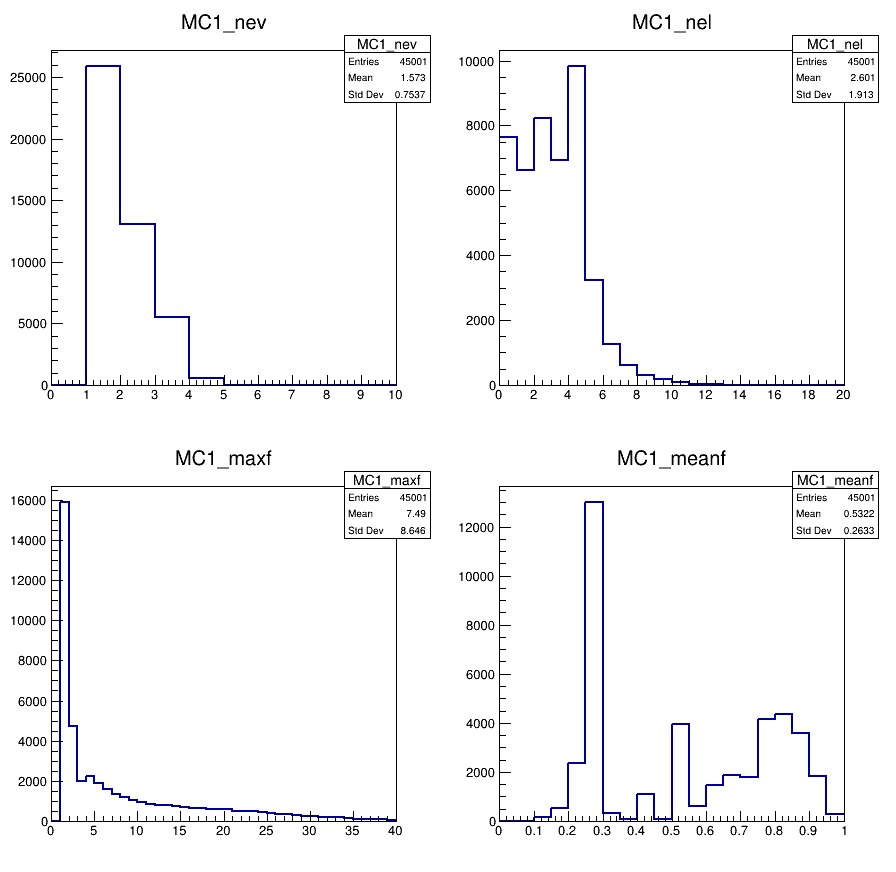

In [7]:
c0b = ROOT.TCanvas('c0b','c0b',900,900)
c0b.Divide(2,2)
c0b.cd(1)
hMC1_nev.Draw()
hMC1_nev.SetLineWidth(2)
c0b.cd(2)
hMC1_nel.Draw()
hMC1_nel.SetLineWidth(2)
c0b.cd(3)
hMC1_maxf.Draw()
hMC1_maxf.SetLineWidth(2)
c0b.cd(4)
hMC1_meanf.Draw()
hMC1_meanf.SetLineWidth(2)
c0b.Draw()

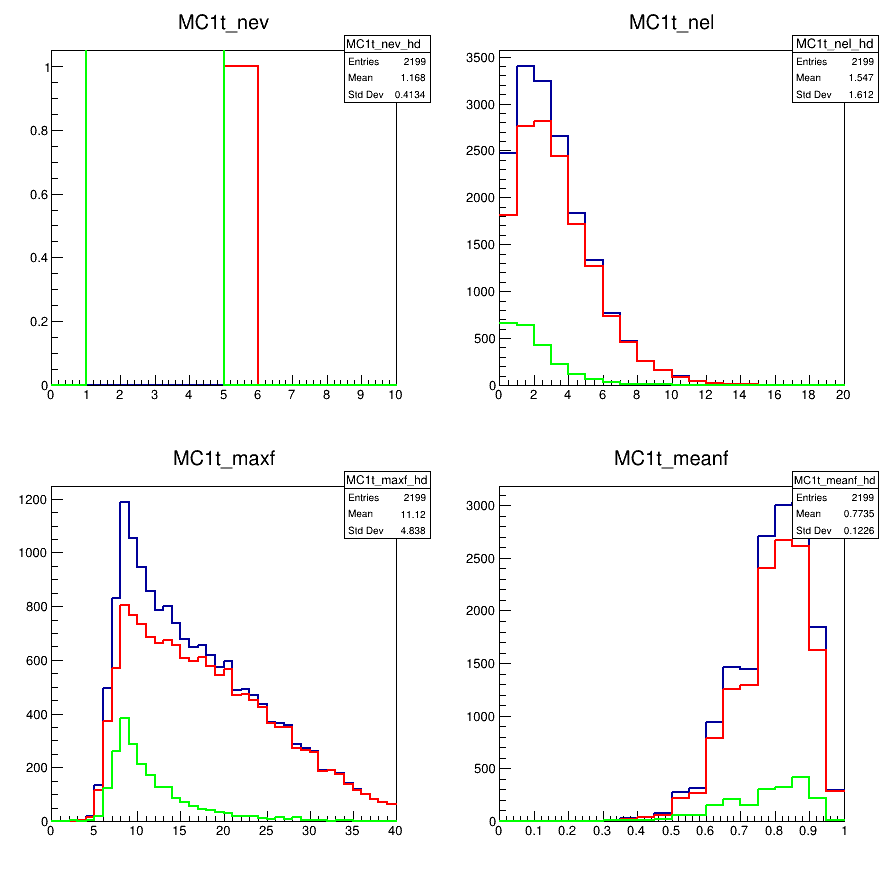

In [8]:
c0c = ROOT.TCanvas('c0c','c0c',900,900)
c0c.Divide(2,2)
c0c.cd(1)
hMC1t_nev.Draw()
hMC1t_nev.SetLineWidth(2)
hMC1t_nev_pr.Draw("sames")
hMC1t_nev_pr.SetLineWidth(2)
hMC1t_nev_pr.SetLineColor(2)
hMC1t_nev_hd.Draw("sames")
hMC1t_nev_hd.SetLineWidth(2)
hMC1t_nev_hd.SetLineColor(3)
c0c.cd(2)
hMC1t_nel.Draw()
hMC1t_nel.SetLineWidth(2)
hMC1t_nel_pr.Draw("sames")
hMC1t_nel_pr.SetLineWidth(2)
hMC1t_nel_pr.SetLineColor(2)
hMC1t_nel_hd.Draw("sames")
hMC1t_nel_hd.SetLineWidth(2)
hMC1t_nel_hd.SetLineColor(3)
c0c.cd(3)
hMC1t_maxf.Draw()
hMC1t_maxf.SetLineWidth(2)
hMC1t_maxf_pr.Draw("sames")
hMC1t_maxf_pr.SetLineWidth(2)
hMC1t_maxf_pr.SetLineColor(2)
hMC1t_maxf_hd.Draw("sames")
hMC1t_maxf_hd.SetLineWidth(2)
hMC1t_maxf_hd.SetLineColor(3)
c0c.cd(4)
hMC1t_meanf.Draw()
hMC1t_meanf.SetLineWidth(2)
hMC1t_meanf_pr.Draw("sames")
hMC1t_meanf_pr.SetLineWidth(2)
hMC1t_meanf_pr.SetLineColor(2)
hMC1t_meanf_hd.Draw("sames")
hMC1t_meanf_hd.SetLineWidth(2)
hMC1t_meanf_hd.SetLineColor(3)
c0c.Draw()

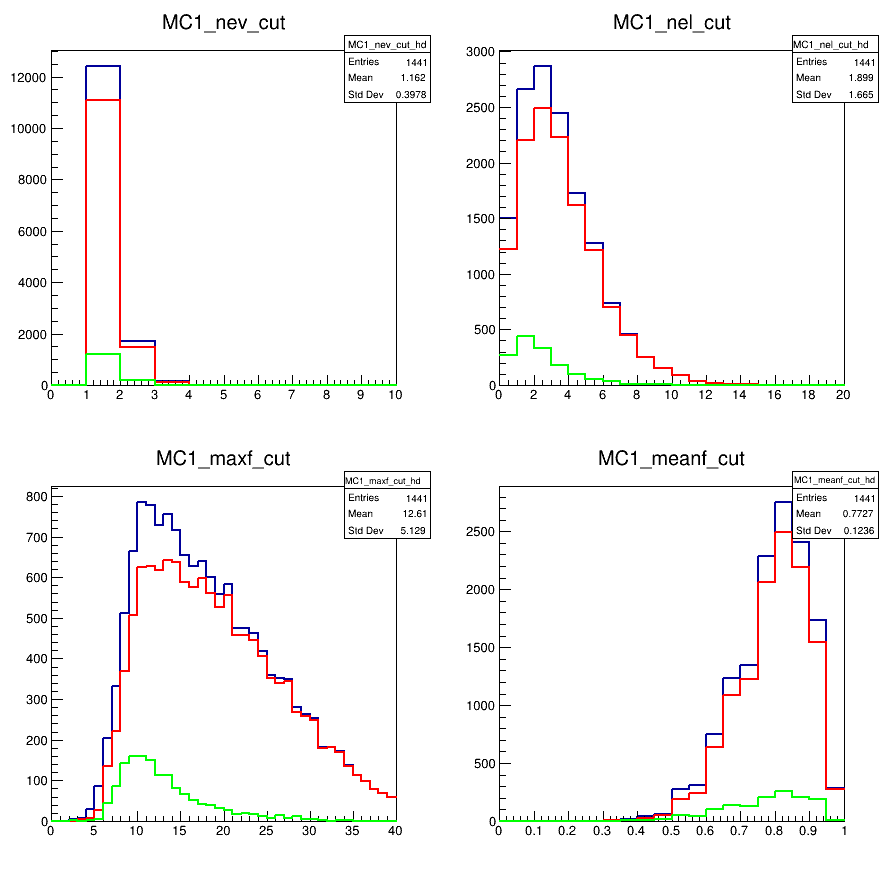

In [9]:
c0d = ROOT.TCanvas('c0d','c0d',900,900)
c0d.Divide(2,2)
c0d.cd(1)
hMC1_nev_cut.Draw()
hMC1_nev_cut.SetLineWidth(2)
hMC1_nev_cut_pr.Draw("sames")
hMC1_nev_cut_pr.SetLineWidth(2)
hMC1_nev_cut_pr.SetLineColor(2)
hMC1_nev_cut_hd.Draw("sames")
hMC1_nev_cut_hd.SetLineWidth(2)
hMC1_nev_cut_hd.SetLineColor(3)
c0d.cd(2)
hMC1_nel_cut.Draw()
hMC1_nel_cut.SetLineWidth(2)
hMC1_nel_cut_pr.Draw("sames")
hMC1_nel_cut_pr.SetLineWidth(2)
hMC1_nel_cut_pr.SetLineColor(2)
hMC1_nel_cut_hd.Draw("sames")
hMC1_nel_cut_hd.SetLineWidth(2)
hMC1_nel_cut_hd.SetLineColor(3)
c0d.cd(3)
hMC1_maxf_cut.Draw()
hMC1_maxf_cut.SetLineWidth(2)
hMC1_maxf_cut_pr.Draw("sames")
hMC1_maxf_cut_pr.SetLineWidth(2)
hMC1_maxf_cut_pr.SetLineColor(2)
hMC1_maxf_cut_hd.Draw("sames")
hMC1_maxf_cut_hd.SetLineWidth(2)
hMC1_maxf_cut_hd.SetLineColor(3)
c0d.cd(4)
hMC1_meanf_cut.Draw()
hMC1_meanf_cut.SetLineWidth(2)
hMC1_meanf_cut_pr.Draw("sames")
hMC1_meanf_cut_pr.SetLineWidth(2)
hMC1_meanf_cut_pr.SetLineColor(2)
hMC1_meanf_cut_hd.Draw("sames")
hMC1_meanf_cut_hd.SetLineWidth(2)
hMC1_meanf_cut_hd.SetLineColor(3)
c0d.Draw()

In [10]:
#ANALISI CH1R1
fDT1 = ROOT.TFile.Open("vtx_BDT_evaluated_DATA_CH1R1.root")
hDT1_bdt= ROOT.TH1F('DT1_bdt','DT1_bdt',100,-1,1)
hDT1_bdt_var= ROOT.TH1F('DT1_bdt_var','DT1_bdt_var',100,0,0.5)
hDT1_vz= ROOT.TH1F('DT1_vz','DT1_vz',15,-35,-5)
hDT1_vz_nobdt= ROOT.TH1F('DT1_vz_nobdt','DT1_vz_nobdt',15,-35,-5)
hDT1_vz_dl= ROOT.TH1F('DT1_vz_dl','DT1_vz_dl',180,0,360)
hDT1_n= ROOT.TH1F('DT1_n','DT1_n',35,0,70)
hDT1_n_nobdt= ROOT.TH1F('DT1_n_nobdt','DT1_n_nobdt',35,0,70)

hDT1t_tx= ROOT.TH1F('DT1t_tx','DT1t_tx',100,-1,1)
hDT1t_ty= ROOT.TH1F('DT1t_ty','DT1t_ty',100,-1,1)
hDT1t_the= ROOT.TH1F('DT1t_the','DT1t_the',500,0,0.5)
hDT1t_logthe= ROOT.TH1F('DT1t_logthe','DT1t_logthe',60,-6,0)
hDT1t_nseg= ROOT.TH1F('DT1t_nseg','DT1t_nseg',30,0,30)

In [11]:
for ev in fDT1.bdt :
    if ev.ntracks>=ntrk_cut: 
        hDT1_bdt.Fill(ev.bdt_value)
        hDT1_bdt_var.Fill((1-ev.bdt_value)/ev.ntracks)
    #if ev.bdt_value>0.3 and ev.ntracks>10: 
    if ev.ntracks > cut_ntrks and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1:
        hDT1_vz_nobdt.Fill(ev.vz/1000.)
        hDT1_n_nobdt.Fill(ev.ntracks)
    if (1-ev.bdt_value)/ev.ntracks <bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1 :
        hDT1_vz.Fill(ev.vz/1000.)
        hDT1_vz_dl.Fill(ev.vz/1000. + dz_CH1)
        hDT1_n.Fill(ev.ntracks)
        for i in range(ev.ntracks):
                hDT1t_tx.Fill(ev.t_eTX[i])
                hDT1t_ty.Fill(ev.t_eTY[i])
                hDT1t_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hDT1t_the.Fill(theta)
                hDT1t_logthe.Fill(logthe) 
        
#hDT1_vz_dl.SaveAs("DT1_vz_dl.root")

Error in <TFile::TFile>: file tmva_input_vertices.root does not exist


In [12]:
scale_factor_1 = nPOT_MC1/nPOT_CH1R1


In [13]:
#eff1 = hDT1_vz.Integral()/hMC1_vz.Integral()
#print(eff1)

BDT RESULT CH1


Info in <TCanvas::SaveAs>: ROOT file CH1_bdt.root has been created


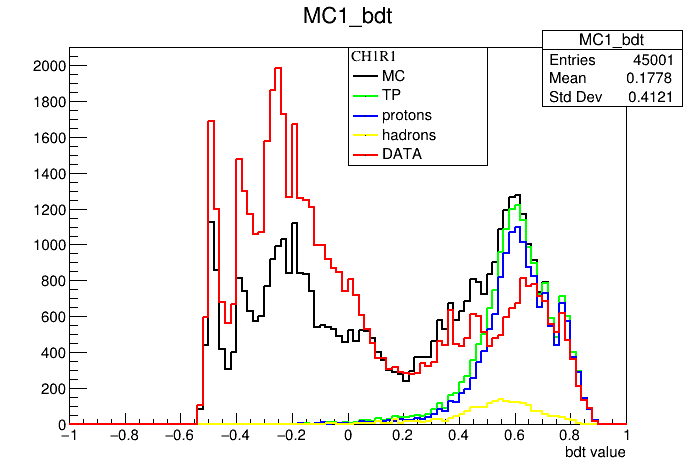

In [14]:
c1 = ROOT.TCanvas('c1','c1',180,10,700,500)
hMC1_bdt.Draw("hist")
hMC1_bdt.GetXaxis().SetTitle("bdt value")
hMC1_bdt.GetYaxis().SetRangeUser(0,2100)
hMC1_bdt.SetLineWidth(2)
hMC1_bdt.SetLineColor(1)
hMC1_bdt_tp.Draw("hist SAME")
hMC1_bdt_tp.SetLineWidth(2)
hMC1_bdt_tp.SetLineColor(3)
hMC1_bdt_pr.Draw("hist SAME")
hMC1_bdt_pr.SetLineWidth(2)
hMC1_bdt_pr.SetLineColor(4)
hMC1_bdt_hd.Draw("hist SAME")
hMC1_bdt_hd.SetLineWidth(2)
hMC1_bdt_hd.SetLineColor(5)
hDT1_bdt.Draw("SAME")
hDT1_bdt.SetLineWidth(2)
hDT1_bdt.SetLineColor(2)
leg1 = ROOT.TLegend(0.5,0.65,0.7,0.9);
leg1.AddEntry(hMC1_bdt,"MC","lp")
leg1.AddEntry(hMC1_bdt_tp,"TP","lp")
leg1.AddEntry(hMC1_bdt_pr,"protons","lp")
leg1.AddEntry(hMC1_bdt_hd,"hadrons","lp")
leg1.AddEntry(hDT1_bdt,"DATA","lp")
leg1.SetTextFont(132)
leg1.SetHeader("CH1R1")
leg1.SetTextFont(42)
leg1.Draw()
c1.Update()
print("BDT RESULT CH1")
c1.Draw()
c1.SaveAs("CH1_bdt.root")
#%jsroot on 


In [15]:
c2 = ROOT.TCanvas('c2','c2',180,10,700,500)
hMC1_bdt_var.Draw("hist")
hMC1_bdt_var.GetXaxis().SetTitle("(1-bdt value)/ntracks")
hMC1_bdt_var.GetYaxis().SetRangeUser(0,2500)
hMC1_bdt_var.SetLineWidth(2)
hMC1_bdt_var.SetLineColor(1)
hMC1_bdt_var_tp.Draw("hist SAME")
hMC1_bdt_var_tp.SetLineWidth(2)
hMC1_bdt_var_tp.SetLineColor(3)
hMC1_bdt_var_pr.Draw("hist SAME")
hMC1_bdt_var_pr.SetLineWidth(2)
hMC1_bdt_var_pr.SetLineColor(4)
hMC1_bdt_var_hd.Draw("hist SAME")
hMC1_bdt_var_hd.SetLineWidth(2)
hMC1_bdt_var_hd.SetLineColor(5)
hDT1_bdt_var.Draw("SAME")
hDT1_bdt_var.SetLineWidth(2)
hDT1_bdt_var.SetLineColor(2)
leg2 = ROOT.TLegend(0.3,0.65,0.5,0.9)
leg2.AddEntry(hMC1_bdt_var,"All Vertices","lp")
leg2.AddEntry(hMC1_bdt_var_tp,"Interactions","lp")
leg2.AddEntry(hMC1_bdt_var_pr,"protons","lp")
leg2.AddEntry(hMC1_bdt_var_hd,"hadrons","lp")
leg2.AddEntry(hDT1_bdt_var,"Data","lp")
leg2.SetTextFont(132)
leg2.SetHeader("CH1R1")
leg2.SetTextFont(42)
leg2.Draw()
c2.Update()
print("BDT VARIABLE CH1")
c2.Draw()
c2.SaveAs("CH1R1_bdt_var.root")
%jsroot on 

BDT VARIABLE CH1


Info in <TCanvas::SaveAs>: ROOT file CH1R1_bdt_var.root has been created


In [16]:
c3b = ROOT.TCanvas('c3b','c3b',180,10,700,500)
hMC1t_vz_pr.Draw("hist")
hMC1t_vz_pr.GetYaxis().SetRangeUser(0,1000)
hMC1t_vz_pr.GetXaxis().SetTitle("vz [mm]")
hMC1t_vz_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_vz_pr.SetLineWidth(2)
hMC1t_vz_hd.Draw("hist SAME")
hMC1t_vz_hd.SetLineWidth(2)
hMC1t_vz_hd.SetLineColor(2)
hMC1t_vz_pr.SetTitle("protons")
hMC1t_vz_hd.SetTitle("hadrons")
leg3b = ROOT.TLegend(0.5,0.4,0.3,0.6);
leg3b.AddEntry(hMC1t_vz_pr,"protons","lp")
leg3b.AddEntry(hMC1t_vz_hd,"hadrons","lp")
leg3b.SetTextFont(132)
leg3b.SetHeader("CH1R1")
leg3b.SetTextFont(42)
leg3b.Draw()
#c1.BuildLegend()
c3b.Update()
c3b.Draw()
#jsroot on 

In [17]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,1800)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT1_vz.SetLineWidth(2)
hDT1_vz.SetLineColor(2)
hDT1_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT1_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT1_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R1")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1_vz_mc_data_R1.root")
#%jsroot on 

Info in <TCanvas::SaveAs>: ROOT file CH1_vz_mc_data_R1.root has been created


In [18]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz_nobdt.Draw("hist")
hMC1_vz_nobdt.GetYaxis().SetRangeUser(0,1000)
hMC1_vz_nobdt.GetXaxis().SetTitle("vz [mm]")
hMC1_vz_nobdt.GetXaxis().SetTitleOffset(1.2)
hMC1_vz_nobdt.SetLineWidth(2)
hDT1_vz_nobdt.SetLineWidth(2)
hDT1_vz_nobdt.SetLineColor(2)
hDT1_vz_nobdt.Draw("SAME")
hMC1_vz_nobdt.SetTitle("Cuts: ntracks > 20")
hDT1_vz_nobdt.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
leg3.AddEntry(hDT1_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R1")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
#%jsroot on 
c3.SaveAs("nobdt_ntrk20_vz.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file nobdt_ntrk20_vz.root has been created


In [19]:
c3c = ROOT.TCanvas('c3c','c3c',180,10,700,500)
hMC1_n_nobdt.Draw("hist")
hMC1_n_nobdt.GetYaxis().SetRangeUser(0,30000)
hMC1_n_nobdt.GetXaxis().SetTitle("multiplicity")
hMC1_n_nobdt.GetXaxis().SetTitleOffset(1.2)
hMC1_n_nobdt.SetLineWidth(2)
hDT1_n_nobdt.SetLineWidth(2)
hDT1_n_nobdt.SetLineColor(2)
hDT1_n_nobdt.Draw("SAME")
hMC1_n_nobdt.SetTitle("Cuts: ntracks > 20")
hDT1_n_nobdt.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_n,"MC","lp")
leg3.AddEntry(hDT1_n,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R1")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3c.Update()
c3c.Draw()
#%jsroot on 
c3c.SetLogy()
c3c.SaveAs("nobdt_ntrk20_n.root")

Info in <TCanvas::SaveAs>: ROOT file nobdt_ntrk20_n.root has been created


In [20]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1180)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R1")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
#%jsroot on 

In [21]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT1_n.SetLineWidth(3)
hDT1_n.SetLineColor(1)
hDT1_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT1_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R1")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1_mult.root has been created


In [22]:
c4 = ROOT.TCanvas('c2','Example',180,10,700,500)
hMC1_n.Draw("hist")
hMC1_n.GetXaxis().SetTitle("multiplicity")
hMC1_n.GetXaxis().SetTitleOffset(1.2)
hMC1_n.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1_n.GetYaxis().SetRangeUser(0,1800)
hMC1_n.SetLineWidth(2)
"""
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
hMC1n_n.SetLineWidth(2)
hMC1n_n.SetLineColor(1)
hMC1n_n.Draw("hist SAME")
"""
hDT1_n.SetLineWidth(2)
hDT1_n.SetLineColor(2)
hDT1_n.Draw("SAME")
#hMC_n.SetTitle("MC")
hMC1t_n.SetTitle("TP")
hDT1_n.SetTitle("DATA")
leg4 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg4.AddEntry(hMC1_n,"MC","lp")
#leg4.AddEntry(hMC1t_n,"TP","lp")
#leg4.AddEntry(hMC1n_n,"FP","lp")
leg4.AddEntry(hDT1_n,"DATA","lp")
leg4.SetTextFont(132)
leg4.SetHeader("CH1R1")
leg4.SetTextFont(42)
leg4.Draw()
#c2.BuildLegend()
c4.Update()
c4.Draw() 
c4.SaveAs("mult_mc_data.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file mult_mc_data.root has been created


In [23]:
hDT1t_tx.Scale(hMC1t_tx.Integral()/hDT1t_tx.Integral())
hDT1t_ty.Scale(hMC1t_ty.Integral()/hDT1t_ty.Integral())
hDT1t_the.Scale(hMC1t_the.Integral()/hDT1t_the.Integral())
hDT1t_logthe.Scale(hMC1t_logthe.Integral()/hDT1t_logthe.Integral())

In [24]:
c5 = ROOT.TCanvas('c5','Example',900,900)
c5.Divide(2,2)
c5.cd(1)
hMC1t_tx.Draw("hist")
#hDT1t_tx.Draw("hist sames")
hDT1t_tx.Draw("sames")
hMC1t_tx.GetXaxis().SetTitle("TX")
hMC1t_tx.GetXaxis().SetTitleOffset(1.2)
hMC1t_tx.GetYaxis().SetRangeUser(0,11800)
hMC1t_tx.SetLineWidth(2)
hMC1t_tx.SetLineColor(2)
hMC1t_tx.SetFillColor(2)
#hDT1t_tx.SetFillColor(3)
#hDT1t_tx.SetLineColor(3)
#hDT1t_tx.SetLineWidth(2)
hDT1t_tx.SetLineColor(1)
hDT1t_tx.SetLineWidth(2)
leg5a = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5a.AddEntry(hMC1t_tx,"MC","lp")
leg5a.AddEntry(hDT1t_tx,"DATA","lp")
leg5a.SetTextFont(132)
leg5a.SetHeader("CH1R1")
leg5a.SetTextFont(42)
leg5a.Draw()
c5.cd(2)
hMC1t_ty.Draw("hist")
hDT1t_ty.Draw("sames")
hMC1t_ty.GetXaxis().SetTitle("TY")
hMC1t_ty.GetXaxis().SetTitleOffset(1.2)
hMC1t_ty.GetYaxis().SetRangeUser(0,11800)
hMC1t_ty.SetLineWidth(2)
hMC1t_ty.SetLineColor(2)
hMC1t_ty.SetFillColor(2)
#hDT1t_ty.SetFillColor(3)
hDT1t_ty.SetLineColor(1)
hDT1t_ty.SetLineWidth(2)
leg5b = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5b.AddEntry(hMC1t_ty,"MC","lp")
leg5b.AddEntry(hDT1t_ty,"DATA","lp")
leg5b.SetTextFont(132)
leg5b.SetHeader("CH1R1")
leg5b.SetTextFont(42)
leg5b.Draw()
c5.cd(3).SetLogy()
hMC1t_the.Draw("hist")
hDT1t_the.Draw("sames")
hMC1t_the.GetXaxis().SetTitle("#theta [rad]")
hMC1t_the.GetXaxis().SetTitleOffset(1.2)
hMC1t_the.GetYaxis().SetRangeUser(0,hDT1t_the.GetMaximum()*1.2)
hMC1t_the.SetLineWidth(2)
hMC1t_the.SetLineColor(2)
hMC1t_the.SetFillColor(2)
#hDT1t_the.SetFillColor(3)
hDT1t_the.SetLineColor(1)
hDT1t_the.SetLineWidth(2)
leg5c = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5c.AddEntry(hMC1t_the,"MC","lp")
leg5c.AddEntry(hDT1t_the,"DATA","lp")
leg5c.SetTextFont(132)
leg5c.SetHeader("CH1R1")
leg5c.SetTextFont(42)
leg5c.Draw()
c5.Update()
c5.cd(4)
hMC1t_logthe.Draw("hist")
hDT1t_logthe.Draw("sames")
hMC1t_logthe.GetXaxis().SetTitle("#theta [rad]")
hMC1t_logthe.GetXaxis().SetTitleOffset(1.2)
hMC1t_logthe.GetYaxis().SetRangeUser(0,3600)
hMC1t_logthe.SetLineWidth(2)
hMC1t_logthe.SetLineColor(2)
hMC1t_logthe.SetFillColor(2)
#hDT1t_logthe.SetFillColor(3)
hDT1t_logthe.SetLineColor(1)
hDT1t_logthe.SetLineWidth(2)
leg5d = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5d.AddEntry(hMC1t_logthe,"MC","lp")
leg5d.AddEntry(hDT1t_logthe,"DATA","lp")
leg5d.SetTextFont(132)
leg5d.SetHeader("CH1R1")
leg5d.SetTextFont(42)
leg5d.Draw()
c5.Update()
c5.Draw() 
c5.SaveAs("CH1R1_ang.root")
#%jsroot on 

Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Info in <TCanvas::SaveAs>: ROOT file CH1R1_ang.root has been created


In [25]:
print("It looks nice!!!")

It looks nice!!!


In [26]:
#ANALISI CH1R2
fDT2 = ROOT.TFile.Open("vtx_BDT_evaluated_DATA_CH1R2.root")
hDT2_bdt= ROOT.TH1F('DT2_bdt','DT2_bdt',100,-1,1)
hDT2_bdt_var= ROOT.TH1F('DT2_bdt_var','DT2_bdt_var',100,0,0.5)
hDT2_vz= ROOT.TH1F('DT2_vz','DT2_vz',15,-35,-5)
hDT2_vz_dl= ROOT.TH1F('DT2_vz_dl','DT2_vz_dl',180,0,360)
hDT2_n= ROOT.TH1F('DT2_n','DT2_n',35,0,70)

hDT2t_tx= ROOT.TH1F('DT2t_tx','DT2t_tx',100,-1,1)
hDT2t_ty= ROOT.TH1F('DT2t_ty','DT2t_ty',100,-1,1)
hDT2t_the= ROOT.TH1F('DT2t_the','DT2t_the',500,0,0.5)
hDT2t_logthe= ROOT.TH1F('DT2t_logthe','DT2t_logthe',60,-6,0)
hDT2t_nseg= ROOT.TH1F('DT2t_nseg','DT2t_nseg',30,0,30)

In [27]:
for ev in fDT2.bdt :
    if ev.ntracks>=ntrk_cut: 
        hDT2_bdt.Fill(ev.bdt_value)
        hDT2_bdt_var.Fill((1-ev.bdt_value)/ev.ntracks)
    #if ev.bdt_value>0.3 and ev.ntracks>10: 
    if (1-ev.bdt_value)/ev.ntracks <bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1 :
        hDT2_vz.Fill(ev.vz/1000.)
        hDT2_vz_dl.Fill(ev.vz/1000. + dz_CH1)
        hDT2_n.Fill(ev.ntracks)
        for i in range(ev.ntracks):
                hDT2t_tx.Fill(ev.t_eTX[i])
                hDT2t_ty.Fill(ev.t_eTY[i])
                hDT2t_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hDT2t_the.Fill(theta)
                hDT2t_logthe.Fill(logthe) 
        
#hDT2_vz_dl.SaveAs("DT2_vz_dl.root")

Error in <TFile::TFile>: file tmva_input_vertices.root does not exist


In [28]:
scale_factor_2 = nPOT_MC1/nPOT_CH1R2
"""
print("Scale factor ",scale_factor_2)
hDT2_vz.Scale(scale_factor_2)
hDT2_vz_dl.Scale(scale_factor_2)
hDT2_n.Scale(scale_factor_2)
hDT2_bdt.Scale(scale_factor_2)
hDT2_bdt_var.Scale(scale_factor_2)
hDT2t_tx.Scale(scale_factor_2)
hDT2t_ty.Scale(scale_factor_2)
hDT2t_nseg.Scale(scale_factor_2)
hDT2t_the.Scale(scale_factor_2)
hDT2t_logthe.Scale(scale_factor_2) 
print(hDT2_vz.Integral())
print(hMC1_vz.Integral())
"""

'\nprint("Scale factor ",scale_factor_2)\nhDT2_vz.Scale(scale_factor_2)\nhDT2_vz_dl.Scale(scale_factor_2)\nhDT2_n.Scale(scale_factor_2)\nhDT2_bdt.Scale(scale_factor_2)\nhDT2_bdt_var.Scale(scale_factor_2)\nhDT2t_tx.Scale(scale_factor_2)\nhDT2t_ty.Scale(scale_factor_2)\nhDT2t_nseg.Scale(scale_factor_2)\nhDT2t_the.Scale(scale_factor_2)\nhDT2t_logthe.Scale(scale_factor_2) \nprint(hDT2_vz.Integral())\nprint(hMC1_vz.Integral())\n'

In [29]:
eff2 = hDT2_vz.Integral()/hMC1_vz.Integral()
print(eff2)

0.7484717459370807


In [30]:
c1 = ROOT.TCanvas('c1','c1',180,10,700,500)
hMC1_bdt.Draw("hist")
hMC1_bdt.GetXaxis().SetTitle("bdt value")
hMC1_bdt.GetYaxis().SetRangeUser(0,2100)
hMC1_bdt.SetLineWidth(2)
hMC1_bdt.SetLineColor(1)
hMC1_bdt_tp.Draw("hist SAME")
hMC1_bdt_tp.SetLineWidth(2)
hMC1_bdt_tp.SetLineColor(3)
hMC1_bdt_pr.Draw("hist SAME")
hMC1_bdt_pr.SetLineWidth(2)
hMC1_bdt_pr.SetLineColor(4)
hMC1_bdt_hd.Draw("hist SAME")
hMC1_bdt_hd.SetLineWidth(2)
hMC1_bdt_hd.SetLineColor(5)
hDT2_bdt.Draw("SAME")
hDT2_bdt.SetLineWidth(2)
hDT2_bdt.SetLineColor(2)
leg1 = ROOT.TLegend(0.5,0.65,0.7,0.9);
leg1.AddEntry(hMC1_bdt,"MC","lp")
leg1.AddEntry(hMC1_bdt_tp,"TP","lp")
leg1.AddEntry(hMC1_bdt_pr,"protons","lp")
leg1.AddEntry(hMC1_bdt_hd,"hadrons","lp")
leg1.AddEntry(hDT2_bdt,"DATA","lp")
leg1.SetTextFont(132)
leg1.SetHeader("CH1R2")
leg1.SetTextFont(42)
leg1.Draw()
c1.Update()
print("BDT RESULT CH1")
c1.Draw()
c1.SaveAs("CH1_bdt.root")
#%jsroot on 


BDT RESULT CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt.root has been created


In [31]:
c2 = ROOT.TCanvas('c2','c2',180,10,700,500)
hMC1_bdt_var.Draw("hist")
hMC1_bdt_var.GetXaxis().SetTitle("(1-bdt value)/ntracks")
hMC1_bdt_var.GetYaxis().SetRangeUser(0,2500)
hMC1_bdt_var.SetLineWidth(2)
hMC1_bdt_var.SetLineColor(1)
hMC1_bdt_var_tp.Draw("hist SAME")
hMC1_bdt_var_tp.SetLineWidth(2)
hMC1_bdt_var_tp.SetLineColor(3)
#hMC1_bdt_var_pr.Draw("hist SAME")
#hMC1_bdt_var_pr.SetLineWidth(2)
#hMC1_bdt_var_pr.SetLineColor(4)
#hMC1_bdt_var_hd.Draw("hist SAME")
#hMC1_bdt_var_hd.SetLineWidth(2)
#hMC1_bdt_var_hd.SetLineColor(5)
hDT2_bdt_var.Draw("SAME")
hDT2_bdt_var.SetLineWidth(2)
hDT2_bdt_var.SetLineColor(2)
leg2 = ROOT.TLegend(0.3,0.65,0.5,0.9)
leg2.AddEntry(hMC1_bdt_var,"MC","lp")
leg2.AddEntry(hMC1_bdt_var_tp,"Interactions","lp")
#leg2.AddEntry(hMC1_bdt_var_pr,"protons","lp")
#leg2.AddEntry(hMC1_bdt_var_hd,"hadrons","lp")
leg2.AddEntry(hDT2_bdt_var,"DATA","lp")
leg2.SetTextFont(132)
leg2.SetHeader("CH1R2")
leg2.SetTextFont(42)
leg2.Draw()
c2.Update()
print("BDT VARIABLE CH1")
c2.Draw()
c2.SaveAs("CH1_bdt_var.root")
%jsroot on 

BDT VARIABLE CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt_var.root has been created


In [32]:
c3b = ROOT.TCanvas('c3b','c3b',180,10,700,500)
hMC1t_vz_pr.Draw("hist")
hMC1t_vz_pr.GetYaxis().SetRangeUser(0,1000)
hMC1t_vz_pr.GetXaxis().SetTitle("vz [mm]")
hMC1t_vz_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_vz_pr.SetLineWidth(2)
hMC1t_vz_hd.Draw("hist SAME")
hMC1t_vz_hd.SetLineWidth(2)
hMC1t_vz_hd.SetLineColor(2)
hMC1t_vz_pr.SetTitle("protons")
hMC1t_vz_hd.SetTitle("hadrons")
leg3b = ROOT.TLegend(0.5,0.4,0.3,0.6);
leg3b.AddEntry(hMC1t_vz_pr,"protons","lp")
leg3b.AddEntry(hMC1t_vz_hd,"hadrons","lp")
leg3b.SetTextFont(132)
leg3b.SetHeader("CH1R2")
leg3b.SetTextFont(42)
leg3b.Draw()
#c1.BuildLegend()
c3b.Update()
c3b.Draw()
#jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3b


In [33]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,1800)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT2_vz.SetLineWidth(2)
hDT2_vz.SetLineColor(2)
hDT2_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT2_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT2_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R2")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1_vz_mc_data_R2.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file CH1_vz_mc_data_R2.root has been created


In [34]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1180)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R2")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b


In [35]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT2_n.SetLineWidth(3)
hDT2_n.SetLineColor(1)
hDT2_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT2_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R2")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1_mult.root has been created


In [36]:
c4 = ROOT.TCanvas('c2','Example',180,10,700,500)
hMC1_n.Draw("hist")
hMC1_n.GetXaxis().SetTitle("multiplicity")
hMC1_n.GetXaxis().SetTitleOffset(1.2)
hMC1_n.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1_n.GetYaxis().SetRangeUser(0,1800)
hMC1_n.SetLineWidth(2)
"""
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
hMC1n_n.SetLineWidth(2)
hMC1n_n.SetLineColor(1)
hMC1n_n.Draw("hist SAME")
"""
hDT2_n.SetLineWidth(2)
hDT2_n.SetLineColor(2)
hDT2_n.Draw("SAME")
#hMC_n.SetTitle("MC")
hMC1t_n.SetTitle("TP")
hDT2_n.SetTitle("DATA")
leg4 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg4.AddEntry(hMC1_n,"MC","lp")
#leg4.AddEntry(hMC1t_n,"TP","lp")
#leg4.AddEntry(hMC1n_n,"FP","lp")
leg4.AddEntry(hDT2_n,"DATA","lp")
leg4.SetTextFont(132)
leg4.SetHeader("CH1R2")
leg4.SetTextFont(42)
leg4.Draw()
#c2.BuildLegend()
c4.Update()
c4.Draw() 
c4.SaveAs("mult_mc_data.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file mult_mc_data.root has been created


In [37]:
hDT2t_tx.Scale(hMC1t_tx.Integral()/hDT2t_tx.Integral())
hDT2t_ty.Scale(hMC1t_ty.Integral()/hDT2t_ty.Integral())
hDT2t_the.Scale(hMC1t_the.Integral()/hDT2t_the.Integral())
hDT2t_logthe.Scale(hMC1t_logthe.Integral()/hDT2t_logthe.Integral())

In [38]:
c5 = ROOT.TCanvas('c5','Example',900,900)
c5.Divide(2,2)
c5.cd(1)
hMC1t_tx.Draw("hist")
#hDT2t_tx.Draw("hist sames")
hDT2t_tx.Draw("sames")
hMC1t_tx.GetXaxis().SetTitle("TX")
hMC1t_tx.GetXaxis().SetTitleOffset(1.2)
hMC1t_tx.GetYaxis().SetRangeUser(0,11800)
hMC1t_tx.SetLineWidth(2)
hMC1t_tx.SetLineColor(2)
hMC1t_tx.SetFillColor(2)
#hDT2t_tx.SetFillColor(3)
#hDT2t_tx.SetLineColor(3)
#hDT2t_tx.SetLineWidth(2)
hDT2t_tx.SetLineColor(1)
hDT2t_tx.SetLineWidth(2)
leg5a = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5a.AddEntry(hMC1t_tx,"MC","lp")
leg5a.AddEntry(hDT2t_tx,"DATA","lp")
leg5a.SetTextFont(132)
leg5a.SetHeader("CH1R2")
leg5a.SetTextFont(42)
leg5a.Draw()
c5.cd(2)
hMC1t_ty.Draw("hist")
hDT2t_ty.Draw("sames")
hMC1t_ty.GetXaxis().SetTitle("TY")
hMC1t_ty.GetXaxis().SetTitleOffset(1.2)
hMC1t_ty.GetYaxis().SetRangeUser(0,11800)
hMC1t_ty.SetLineWidth(2)
hMC1t_ty.SetLineColor(2)
hMC1t_ty.SetFillColor(2)
#hDT2t_ty.SetFillColor(3)
hDT2t_ty.SetLineColor(1)
hDT2t_ty.SetLineWidth(2)
leg5b = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5b.AddEntry(hMC1t_ty,"MC","lp")
leg5b.AddEntry(hDT2t_ty,"DATA","lp")
leg5b.SetTextFont(132)
leg5b.SetHeader("CH1R2")
leg5b.SetTextFont(42)
leg5b.Draw()
c5.cd(3).SetLogy()
hMC1t_the.Draw("hist")
hDT2t_the.Draw("sames")
hMC1t_the.GetXaxis().SetTitle("#theta [rad]")
hMC1t_the.GetXaxis().SetTitleOffset(1.2)
hMC1t_the.GetYaxis().SetRangeUser(0,hDT2t_the.GetMaximum()*1.2)
hMC1t_the.SetLineWidth(2)
hMC1t_the.SetLineColor(2)
hMC1t_the.SetFillColor(2)
#hDT2t_the.SetFillColor(3)
hDT2t_the.SetLineColor(1)
hDT2t_the.SetLineWidth(2)
leg5c = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5c.AddEntry(hMC1t_the,"MC","lp")
leg5c.AddEntry(hDT2t_the,"DATA","lp")
leg5c.SetTextFont(132)
leg5c.SetHeader("CH1R2")
leg5c.SetTextFont(42)
leg5c.Draw()
c5.Update()
c5.cd(4)
hMC1t_logthe.Draw("hist")
hDT2t_logthe.Draw("sames")
hMC1t_logthe.GetXaxis().SetTitle("#theta [rad]")
hMC1t_logthe.GetXaxis().SetTitleOffset(1.2)
hMC1t_logthe.GetYaxis().SetRangeUser(0,3600)
hMC1t_logthe.SetLineWidth(2)
hMC1t_logthe.SetLineColor(2)
hMC1t_logthe.SetFillColor(2)
#hDT2t_logthe.SetFillColor(3)
hDT2t_logthe.SetLineColor(1)
hDT2t_logthe.SetLineWidth(2)
leg5d = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5d.AddEntry(hMC1t_logthe,"MC","lp")
leg5d.AddEntry(hDT2t_logthe,"DATA","lp")
leg5d.SetTextFont(132)
leg5d.SetHeader("CH1R2")
leg5d.SetTextFont(42)
leg5d.Draw()
c5.Update()
c5.Draw() 
c5.SaveAs("CH1_ang.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Info in <TCanvas::SaveAs>: ROOT file CH1_ang.root has been created


In [39]:
print("It looks nice!!!")

It looks nice!!!


In [40]:
#ANALISI CH1R3
fDT3 = ROOT.TFile.Open("vtx_BDT_evaluated_DATA_CH1R3.root")
hDT3_bdt= ROOT.TH1F('DT3_bdt','DT3_bdt',100,-1,1)
hDT3_bdt_var= ROOT.TH1F('DT3_bdt_var','DT3_bdt_var',100,0,0.5)
hDT3_vz= ROOT.TH1F('DT3_vz','DT3_vz',15,-35,-5)
hDT3_vz_dl= ROOT.TH1F('DT3_vz_dl','DT3_vz_dl',180,0,360)
hDT3_n= ROOT.TH1F('DT3_n','DT3_n',35,0,70)

hDT3t_tx= ROOT.TH1F('DT3t_tx','DT3t_tx',100,-1,1)
hDT3t_ty= ROOT.TH1F('DT3t_ty','DT3t_ty',100,-1,1)
hDT3t_the= ROOT.TH1F('DT3t_the','DT3t_the',500,0,0.5)
hDT3t_logthe= ROOT.TH1F('DT3t_logthe','DT3t_logthe',60,-6,0)
hDT3t_nseg= ROOT.TH1F('DT3t_nseg','DT3t_nseg',30,0,30)

In [41]:
for ev in fDT3.bdt :
    if ev.ntracks>=ntrk_cut: 
        hDT3_bdt.Fill(ev.bdt_value)
        hDT3_bdt_var.Fill((1-ev.bdt_value)/ev.ntracks)
    #if ev.bdt_value>0.3 and ev.ntracks>10: 
    if (1-ev.bdt_value)/ev.ntracks <bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1 :
        hDT3_vz.Fill(ev.vz/1000.)
        hDT3_vz_dl.Fill(ev.vz/1000. + dz_CH1)
        hDT3_n.Fill(ev.ntracks)
        for i in range(ev.ntracks):
                hDT3t_tx.Fill(ev.t_eTX[i])
                hDT3t_ty.Fill(ev.t_eTY[i])
                hDT3t_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hDT3t_the.Fill(theta)
                hDT3t_logthe.Fill(logthe) 
        
#hDT3_vz_dl.SaveAs("DT3_vz_dl.root")

Error in <TFile::TFile>: file tmva_input_vertices.root does not exist


In [42]:
scale_factor_3 = nPOT_MC1/nPOT_CH1R3
"""
print("Scale factor ",scale_factor_3)
hDT3_vz.Scale(scale_factor_3)
hDT3_vz_dl.Scale(scale_factor_3)
hDT3_n.Scale(scale_factor_3)
hDT3_bdt.Scale(scale_factor_3)
hDT3_bdt_var.Scale(scale_factor_3)
hDT3t_tx.Scale(scale_factor_3)
hDT3t_ty.Scale(scale_factor_3)
hDT3t_nseg.Scale(scale_factor_3)
hDT3t_the.Scale(scale_factor_3)
hDT3t_logthe.Scale(scale_factor_3) 
print(hDT3_vz.Integral())
print(hMC1_vz.Integral())
"""

'\nprint("Scale factor ",scale_factor_3)\nhDT3_vz.Scale(scale_factor_3)\nhDT3_vz_dl.Scale(scale_factor_3)\nhDT3_n.Scale(scale_factor_3)\nhDT3_bdt.Scale(scale_factor_3)\nhDT3_bdt_var.Scale(scale_factor_3)\nhDT3t_tx.Scale(scale_factor_3)\nhDT3t_ty.Scale(scale_factor_3)\nhDT3t_nseg.Scale(scale_factor_3)\nhDT3t_the.Scale(scale_factor_3)\nhDT3t_logthe.Scale(scale_factor_3) \nprint(hDT3_vz.Integral())\nprint(hMC1_vz.Integral())\n'

In [43]:
eff3 = hDT3_vz.Integral()/hMC1_vz.Integral()
print(eff3)

0.20910988519457283


In [44]:
c1 = ROOT.TCanvas('c1','c1',180,10,700,500)
hMC1_bdt.Draw("hist")
hMC1_bdt.GetXaxis().SetTitle("bdt value")
hMC1_bdt.GetYaxis().SetRangeUser(0,2100)
hMC1_bdt.SetLineWidth(2)
hMC1_bdt.SetLineColor(1)
hMC1_bdt_tp.Draw("hist SAME")
hMC1_bdt_tp.SetLineWidth(2)
hMC1_bdt_tp.SetLineColor(3)
hMC1_bdt_pr.Draw("hist SAME")
hMC1_bdt_pr.SetLineWidth(2)
hMC1_bdt_pr.SetLineColor(4)
hMC1_bdt_hd.Draw("hist SAME")
hMC1_bdt_hd.SetLineWidth(2)
hMC1_bdt_hd.SetLineColor(5)
hDT3_bdt.Draw("SAME")
hDT3_bdt.SetLineWidth(2)
hDT3_bdt.SetLineColor(2)
leg1 = ROOT.TLegend(0.5,0.65,0.7,0.9);
leg1.AddEntry(hMC1_bdt,"MC","lp")
leg1.AddEntry(hMC1_bdt_tp,"TP","lp")
leg1.AddEntry(hMC1_bdt_pr,"protons","lp")
leg1.AddEntry(hMC1_bdt_hd,"hadrons","lp")
leg1.AddEntry(hDT3_bdt,"DATA","lp")
leg1.SetTextFont(132)
leg1.SetHeader("CH1R3")
leg1.SetTextFont(42)
leg1.Draw()
c1.Update()
print("BDT RESULT CH1")
c1.Draw()
c1.SaveAs("CH1_bdt.root")
#%jsroot on 


BDT RESULT CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt.root has been created


In [45]:
c2 = ROOT.TCanvas('c2','c2',180,10,700,500)
hMC1_bdt_var.Draw("hist")
hMC1_bdt_var.GetXaxis().SetTitle("(1-bdt value)/ntracks")
hMC1_bdt_var.GetYaxis().SetRangeUser(0,2500)
hMC1_bdt_var.SetLineWidth(2)
hMC1_bdt_var.SetLineColor(1)
hMC1_bdt_var_tp.Draw("hist SAME")
hMC1_bdt_var_tp.SetLineWidth(2)
hMC1_bdt_var_tp.SetLineColor(3)
hMC1_bdt_var_pr.Draw("hist SAME")
hMC1_bdt_var_pr.SetLineWidth(2)
hMC1_bdt_var_pr.SetLineColor(4)
hMC1_bdt_var_hd.Draw("hist SAME")
hMC1_bdt_var_hd.SetLineWidth(2)
hMC1_bdt_var_hd.SetLineColor(5)
hDT3_bdt_var.Draw("SAME")
hDT3_bdt_var.SetLineWidth(2)
hDT3_bdt_var.SetLineColor(2)
leg2 = ROOT.TLegend(0.3,0.65,0.5,0.9)
leg2.AddEntry(hMC1_bdt_var,"MC","lp")
leg2.AddEntry(hMC1_bdt_var_tp,"TP","lp")
leg2.AddEntry(hMC1_bdt_var_pr,"protons","lp")
leg2.AddEntry(hMC1_bdt_var_hd,"hadrons","lp")
leg2.AddEntry(hDT3_bdt_var,"DATA","lp")
leg2.SetTextFont(132)
leg2.SetHeader("CH1R3")
leg2.SetTextFont(42)
leg2.Draw()
c2.Update()
print("BDT VARIABLE CH1")
c2.Draw()
c2.SaveAs("CH1_bdt_var.root")
%jsroot on 

BDT VARIABLE CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt_var.root has been created


In [46]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,1800)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT3_vz.SetLineWidth(2)
hDT3_vz.SetLineColor(2)
hDT3_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT3_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT3_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R3")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1_vz_mc_data_R3.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file CH1_vz_mc_data_R3.root has been created


In [47]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT3_n.SetLineWidth(3)
hDT3_n.SetLineColor(1)
hDT3_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT3_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R3")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1_mult.root has been created


In [48]:
c4 = ROOT.TCanvas('c2','Example',180,10,700,500)
hMC1_n.Draw("hist")
hMC1_n.GetXaxis().SetTitle("multiplicity")
hMC1_n.GetXaxis().SetTitleOffset(1.2)
hMC1_n.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1_n.GetYaxis().SetRangeUser(0,1800)
hMC1_n.SetLineWidth(2)
"""
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
hMC1n_n.SetLineWidth(2)
hMC1n_n.SetLineColor(1)
hMC1n_n.Draw("hist SAME")
"""
hDT3_n.SetLineWidth(2)
hDT3_n.SetLineColor(2)
hDT3_n.Draw("SAME")
#hMC_n.SetTitle("MC")
hMC1t_n.SetTitle("TP")
hDT3_n.SetTitle("DATA")
leg4 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg4.AddEntry(hMC1_n,"MC","lp")
#leg4.AddEntry(hMC1t_n,"TP","lp")
#leg4.AddEntry(hMC1n_n,"FP","lp")
leg4.AddEntry(hDT3_n,"DATA","lp")
leg4.SetTextFont(132)
leg4.SetHeader("CH1R3")
leg4.SetTextFont(42)
leg4.Draw()
#c2.BuildLegend()
c4.Update()
c4.Draw() 
c4.SaveAs("mult_mc_data.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file mult_mc_data.root has been created


In [49]:
hDT3t_tx.Scale(hMC1t_tx.Integral()/hDT3t_tx.Integral())
hDT3t_ty.Scale(hMC1t_ty.Integral()/hDT3t_ty.Integral())
hDT3t_the.Scale(hMC1t_the.Integral()/hDT3t_the.Integral())
hDT3t_logthe.Scale(hMC1t_logthe.Integral()/hDT3t_logthe.Integral())

In [50]:
c5 = ROOT.TCanvas('c5','Example',900,900)
c5.Divide(2,2)
c5.cd(1)
hMC1t_tx.Draw("hist")
#hDT3t_tx.Draw("hist sames")
hDT3t_tx.Draw("sames")
hMC1t_tx.GetXaxis().SetTitle("TX")
hMC1t_tx.GetXaxis().SetTitleOffset(1.2)
hMC1t_tx.GetYaxis().SetRangeUser(0,11800)
hMC1t_tx.SetLineWidth(2)
hMC1t_tx.SetLineColor(2)
hMC1t_tx.SetFillColor(2)
#hDT3t_tx.SetFillColor(3)
#hDT3t_tx.SetLineColor(3)
#hDT3t_tx.SetLineWidth(2)
hDT3t_tx.SetLineColor(1)
hDT3t_tx.SetLineWidth(2)
leg5a = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5a.AddEntry(hMC1t_tx,"MC","lp")
leg5a.AddEntry(hDT3t_tx,"DATA","lp")
leg5a.SetTextFont(132)
leg5a.SetHeader("CH1R3")
leg5a.SetTextFont(42)
leg5a.Draw()
c5.cd(2)
hMC1t_ty.Draw("hist")
hDT3t_ty.Draw("sames")
hMC1t_ty.GetXaxis().SetTitle("TY")
hMC1t_ty.GetXaxis().SetTitleOffset(1.2)
hMC1t_ty.GetYaxis().SetRangeUser(0,11800)
hMC1t_ty.SetLineWidth(2)
hMC1t_ty.SetLineColor(2)
hMC1t_ty.SetFillColor(2)
#hDT3t_ty.SetFillColor(3)
hDT3t_ty.SetLineColor(1)
hDT3t_ty.SetLineWidth(2)
leg5b = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5b.AddEntry(hMC1t_ty,"MC","lp")
leg5b.AddEntry(hDT3t_ty,"DATA","lp")
leg5b.SetTextFont(132)
leg5b.SetHeader("CH1R3")
leg5b.SetTextFont(42)
leg5b.Draw()
c5.cd(3).SetLogy()
hMC1t_the.Draw("hist")
hDT3t_the.Draw("sames")
hMC1t_the.GetXaxis().SetTitle("#theta [rad]")
hMC1t_the.GetXaxis().SetTitleOffset(1.2)
hMC1t_the.GetYaxis().SetRangeUser(0,hDT3t_the.GetMaximum()*1.2)
hMC1t_the.SetLineWidth(2)
hMC1t_the.SetLineColor(2)
hMC1t_the.SetFillColor(2)
#hDT3t_the.SetFillColor(3)
hDT3t_the.SetLineColor(1)
hDT3t_the.SetLineWidth(2)
leg5c = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5c.AddEntry(hMC1t_the,"MC","lp")
leg5c.AddEntry(hDT3t_the,"DATA","lp")
leg5c.SetTextFont(132)
leg5c.SetHeader("CH1R3")
leg5c.SetTextFont(42)
leg5c.Draw()
c5.Update()
c5.cd(4)
hMC1t_logthe.Draw("hist")
hDT3t_logthe.Draw("sames")
hMC1t_logthe.GetXaxis().SetTitle("#theta [rad]")
hMC1t_logthe.GetXaxis().SetTitleOffset(1.2)
hMC1t_logthe.GetYaxis().SetRangeUser(0,3600)
hMC1t_logthe.SetLineWidth(2)
hMC1t_logthe.SetLineColor(2)
hMC1t_logthe.SetFillColor(2)
#hDT3t_logthe.SetFillColor(3)
hDT3t_logthe.SetLineColor(1)
hDT3t_logthe.SetLineWidth(2)
leg5d = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5d.AddEntry(hMC1t_logthe,"MC","lp")
leg5d.AddEntry(hDT3t_logthe,"DATA","lp")
leg5d.SetTextFont(132)
leg5d.SetHeader("CH1R3")
leg5d.SetTextFont(42)
leg5d.Draw()
c5.Update()
c5.Draw() 
c5.SaveAs("CH1_ang.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Info in <TCanvas::SaveAs>: ROOT file CH1_ang.root has been created


In [51]:
print("It looks nice!!!")

It looks nice!!!


In [52]:
#ANALISI CH1R4
fDT4 = ROOT.TFile.Open("vtx_BDT_evaluated_DATA_CH1R4.root")
hDT4_bdt= ROOT.TH1F('DT4_bdt','DT4_bdt',100,-1,1)
hDT4_bdt_var= ROOT.TH1F('DT4_bdt_var','DT4_bdt_var',100,0,0.5)
hDT4_vz= ROOT.TH1F('DT4_vz','DT4_vz',15,-35,-5)
hDT4_vz_dl= ROOT.TH1F('DT4_vz_dl','DT4_vz_dl',180,0,360)
hDT4_n= ROOT.TH1F('DT4_n','DT4_n',35,0,70)

hDT4t_tx= ROOT.TH1F('DT4t_tx','DT4t_tx',100,-1,1)
hDT4t_ty= ROOT.TH1F('DT4t_ty','DT4t_ty',100,-1,1)
hDT4t_the= ROOT.TH1F('DT4t_the','DT4t_the',500,0,0.5)
hDT4t_logthe= ROOT.TH1F('DT4t_logthe','DT4t_logthe',60,-6,0)
hDT4t_nseg= ROOT.TH1F('DT4t_nseg','DT4t_nseg',30,0,30)

In [53]:
for ev in fDT4.bdt :
    if ev.ntracks>=ntrk_cut: 
        hDT4_bdt.Fill(ev.bdt_value)
        hDT4_bdt_var.Fill((1-ev.bdt_value)/ev.ntracks)
    #if ev.bdt_value>0.3 and ev.ntracks>10: 
    if (1-ev.bdt_value)/ev.ntracks <bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1 :
        hDT4_vz.Fill(ev.vz/1000.)
        hDT4_vz_dl.Fill(ev.vz/1000. + dz_CH1)
        hDT4_n.Fill(ev.ntracks)
        for i in range(ev.ntracks):
                hDT4t_tx.Fill(ev.t_eTX[i])
                hDT4t_ty.Fill(ev.t_eTY[i])
                hDT4t_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hDT4t_the.Fill(theta)
                hDT4t_logthe.Fill(logthe) 
        
#hDT4_vz_dl.SaveAs("DT4_vz_dl.root")

Error in <TFile::TFile>: file tmva_input_vertices.root does not exist


In [54]:
scale_factor_4 = nPOT_MC1/nPOT_CH1R4
"""
print("Scale factor ",scale_factor_4)
hDT4_vz.Scale(scale_factor_4)
hDT4_vz_dl.Scale(scale_factor_4)
hDT4_n.Scale(scale_factor_4)
hDT4_bdt.Scale(scale_factor_4)
hDT4_bdt_var.Scale(scale_factor_4)
hDT4t_tx.Scale(scale_factor_4)
hDT4t_ty.Scale(scale_factor_4)
hDT4t_nseg.Scale(scale_factor_4)
hDT4t_the.Scale(scale_factor_4)
hDT4t_logthe.Scale(scale_factor_4) 
print(hDT4_vz.Integral())
print(hMC1_vz.Integral())
"""

'\nprint("Scale factor ",scale_factor_4)\nhDT4_vz.Scale(scale_factor_4)\nhDT4_vz_dl.Scale(scale_factor_4)\nhDT4_n.Scale(scale_factor_4)\nhDT4_bdt.Scale(scale_factor_4)\nhDT4_bdt_var.Scale(scale_factor_4)\nhDT4t_tx.Scale(scale_factor_4)\nhDT4t_ty.Scale(scale_factor_4)\nhDT4t_nseg.Scale(scale_factor_4)\nhDT4t_the.Scale(scale_factor_4)\nhDT4t_logthe.Scale(scale_factor_4) \nprint(hDT4_vz.Integral())\nprint(hMC1_vz.Integral())\n'

In [55]:
eff4 = hDT4_vz.Integral()/hMC1_vz.Integral()
print(eff4)

0.28052780676904726


In [56]:
c1 = ROOT.TCanvas('c1','c1',180,10,700,500)
hMC1_bdt.Draw("hist")
hMC1_bdt.GetXaxis().SetTitle("bdt value")
hMC1_bdt.GetYaxis().SetRangeUser(0,2100)
hMC1_bdt.SetLineWidth(2)
hMC1_bdt.SetLineColor(1)
hMC1_bdt_tp.Draw("hist SAME")
hMC1_bdt_tp.SetLineWidth(2)
hMC1_bdt_tp.SetLineColor(3)
hMC1_bdt_pr.Draw("hist SAME")
hMC1_bdt_pr.SetLineWidth(2)
hMC1_bdt_pr.SetLineColor(4)
hMC1_bdt_hd.Draw("hist SAME")
hMC1_bdt_hd.SetLineWidth(2)
hMC1_bdt_hd.SetLineColor(5)
hDT4_bdt.Draw("SAME")
hDT4_bdt.SetLineWidth(2)
hDT4_bdt.SetLineColor(2)
leg1 = ROOT.TLegend(0.5,0.65,0.7,0.9);
leg1.AddEntry(hMC1_bdt,"MC","lp")
leg1.AddEntry(hMC1_bdt_tp,"TP","lp")
leg1.AddEntry(hMC1_bdt_pr,"protons","lp")
leg1.AddEntry(hMC1_bdt_hd,"hadrons","lp")
leg1.AddEntry(hDT4_bdt,"DATA","lp")
leg1.SetTextFont(132)
leg1.SetHeader("CH1R4")
leg1.SetTextFont(42)
leg1.Draw()
c1.Update()
print("BDT RESULT CH1")
c1.Draw()
c1.SaveAs("CH1_bdt.root")
#%jsroot on 


BDT RESULT CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt.root has been created


In [57]:
c2 = ROOT.TCanvas('c2','c2',180,10,700,500)
hMC1_bdt_var.Draw("hist")
hMC1_bdt_var.GetXaxis().SetTitle("(1-bdt value)/ntracks")
hMC1_bdt_var.GetYaxis().SetRangeUser(0,2500)
hMC1_bdt_var.SetLineWidth(2)
hMC1_bdt_var.SetLineColor(1)
hMC1_bdt_var_tp.Draw("hist SAME")
hMC1_bdt_var_tp.SetLineWidth(2)
hMC1_bdt_var_tp.SetLineColor(3)
hMC1_bdt_var_pr.Draw("hist SAME")
hMC1_bdt_var_pr.SetLineWidth(2)
hMC1_bdt_var_pr.SetLineColor(4)
hMC1_bdt_var_hd.Draw("hist SAME")
hMC1_bdt_var_hd.SetLineWidth(2)
hMC1_bdt_var_hd.SetLineColor(5)
hDT4_bdt_var.Draw("SAME")
hDT4_bdt_var.SetLineWidth(2)
hDT4_bdt_var.SetLineColor(2)
leg2 = ROOT.TLegend(0.3,0.65,0.5,0.9)
leg2.AddEntry(hMC1_bdt_var,"MC","lp")
leg2.AddEntry(hMC1_bdt_var_tp,"TP","lp")
leg2.AddEntry(hMC1_bdt_var_pr,"protons","lp")
leg2.AddEntry(hMC1_bdt_var_hd,"hadrons","lp")
leg2.AddEntry(hDT4_bdt_var,"DATA","lp")
leg2.SetTextFont(132)
leg2.SetHeader("CH1R4")
leg2.SetTextFont(42)
leg2.Draw()
c2.Update()
print("BDT VARIABLE CH1")
c2.Draw()
c2.SaveAs("CH1_bdt_var.root")
%jsroot on 

BDT VARIABLE CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt_var.root has been created


In [58]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,1800)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT4_vz.SetLineWidth(2)
hDT4_vz.SetLineColor(2)
hDT4_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT4_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT4_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R4")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1_vz_mc_data_R4.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file CH1_vz_mc_data_R4.root has been created


In [59]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT4_n.SetLineWidth(3)
hDT4_n.SetLineColor(1)
hDT4_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT4_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R4")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1_mult.root has been created


In [60]:
c4 = ROOT.TCanvas('c2','Example',180,10,700,500)
hMC1_n.Draw("hist")
hMC1_n.GetXaxis().SetTitle("multiplicity")
hMC1_n.GetXaxis().SetTitleOffset(1.2)
hMC1_n.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1_n.GetYaxis().SetRangeUser(0,1800)
hMC1_n.SetLineWidth(2)
"""
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
hMC1n_n.SetLineWidth(2)
hMC1n_n.SetLineColor(1)
hMC1n_n.Draw("hist SAME")
"""
hDT4_n.SetLineWidth(2)
hDT4_n.SetLineColor(2)
hDT4_n.Draw("SAME")
#hMC_n.SetTitle("MC")
hMC1t_n.SetTitle("TP")
hDT4_n.SetTitle("DATA")
leg4 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg4.AddEntry(hMC1_n,"MC","lp")
#leg4.AddEntry(hMC1t_n,"TP","lp")
#leg4.AddEntry(hMC1n_n,"FP","lp")
leg4.AddEntry(hDT4_n,"DATA","lp")
leg4.SetTextFont(132)
leg4.SetHeader("CH1R4")
leg4.SetTextFont(42)
leg4.Draw()
#c2.BuildLegend()
c4.Update()
c4.Draw() 
c4.SaveAs("mult_mc_data.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file mult_mc_data.root has been created


In [61]:
hDT4t_tx.Scale(hMC1t_tx.Integral()/hDT4t_tx.Integral())
hDT4t_ty.Scale(hMC1t_ty.Integral()/hDT4t_ty.Integral())
hDT4t_the.Scale(hMC1t_the.Integral()/hDT4t_the.Integral())
hDT4t_logthe.Scale(hMC1t_logthe.Integral()/hDT4t_logthe.Integral())

In [62]:
c5 = ROOT.TCanvas('c5','Example',900,900)
c5.Divide(2,2)
c5.cd(1)
hMC1t_tx.Draw("hist")
#hDT4t_tx.Draw("hist sames")
hDT4t_tx.Draw("sames")
hMC1t_tx.GetXaxis().SetTitle("TX")
hMC1t_tx.GetXaxis().SetTitleOffset(1.2)
hMC1t_tx.GetYaxis().SetRangeUser(0,11800)
hMC1t_tx.SetLineWidth(2)
hMC1t_tx.SetLineColor(2)
hMC1t_tx.SetFillColor(2)
#hDT4t_tx.SetFillColor(3)
#hDT4t_tx.SetLineColor(3)
#hDT4t_tx.SetLineWidth(2)
hDT4t_tx.SetLineColor(1)
hDT4t_tx.SetLineWidth(2)
leg5a = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5a.AddEntry(hMC1t_tx,"MC","lp")
leg5a.AddEntry(hDT4t_tx,"DATA","lp")
leg5a.SetTextFont(132)
leg5a.SetHeader("CH1R4")
leg5a.SetTextFont(42)
leg5a.Draw()
c5.cd(2)
hMC1t_ty.Draw("hist")
hDT4t_ty.Draw("sames")
hMC1t_ty.GetXaxis().SetTitle("TY")
hMC1t_ty.GetXaxis().SetTitleOffset(1.2)
hMC1t_ty.GetYaxis().SetRangeUser(0,11800)
hMC1t_ty.SetLineWidth(2)
hMC1t_ty.SetLineColor(2)
hMC1t_ty.SetFillColor(2)
#hDT4t_ty.SetFillColor(3)
hDT4t_ty.SetLineColor(1)
hDT4t_ty.SetLineWidth(2)
leg5b = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5b.AddEntry(hMC1t_ty,"MC","lp")
leg5b.AddEntry(hDT4t_ty,"DATA","lp")
leg5b.SetTextFont(132)
leg5b.SetHeader("CH1R4")
leg5b.SetTextFont(42)
leg5b.Draw()
c5.cd(3).SetLogy()
hMC1t_the.Draw("hist")
hDT4t_the.Draw("sames")
hMC1t_the.GetXaxis().SetTitle("#theta [rad]")
hMC1t_the.GetXaxis().SetTitleOffset(1.2)
hMC1t_the.GetYaxis().SetRangeUser(0,hDT4t_the.GetMaximum()*1.2)
hMC1t_the.SetLineWidth(2)
hMC1t_the.SetLineColor(2)
hMC1t_the.SetFillColor(2)
#hDT4t_the.SetFillColor(3)
hDT4t_the.SetLineColor(1)
hDT4t_the.SetLineWidth(2)
leg5c = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5c.AddEntry(hMC1t_the,"MC","lp")
leg5c.AddEntry(hDT4t_the,"DATA","lp")
leg5c.SetTextFont(132)
leg5c.SetHeader("CH1R4")
leg5c.SetTextFont(42)
leg5c.Draw()
c5.Update()
c5.cd(4)
hMC1t_logthe.Draw("hist")
hDT4t_logthe.Draw("sames")
hMC1t_logthe.GetXaxis().SetTitle("#theta [rad]")
hMC1t_logthe.GetXaxis().SetTitleOffset(1.2)
hMC1t_logthe.GetYaxis().SetRangeUser(0,3600)
hMC1t_logthe.SetLineWidth(2)
hMC1t_logthe.SetLineColor(2)
hMC1t_logthe.SetFillColor(2)
#hDT4t_logthe.SetFillColor(3)
hDT4t_logthe.SetLineColor(1)
hDT4t_logthe.SetLineWidth(2)
leg5d = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5d.AddEntry(hMC1t_logthe,"MC","lp")
leg5d.AddEntry(hDT4t_logthe,"DATA","lp")
leg5d.SetTextFont(132)
leg5d.SetHeader("CH1R4")
leg5d.SetTextFont(42)
leg5d.Draw()
c5.Update()
c5.Draw() 
c5.SaveAs("CH1_ang.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Info in <TCanvas::SaveAs>: ROOT file CH1_ang.root has been created


In [63]:
print ("It looks nice!!!")

It looks nice!!!


In [64]:
#ANALISI CH1R5
fDT5 = ROOT.TFile.Open("vtx_BDT_evaluated_DATA_CH1R5.root")
hDT5_bdt= ROOT.TH1F('DT5_bdt','DT5_bdt',100,-1,1)
hDT5_bdt_var= ROOT.TH1F('DT5_bdt_var','DT5_bdt_var',100,0,0.5)
hDT5_vz= ROOT.TH1F('DT5_vz','DT5_vz',15,-35,-5)
hDT5_vz_dl= ROOT.TH1F('DT5_vz_dl','DT5_vz_dl',180,0,360)
hDT5_n= ROOT.TH1F('DT5_n','DT5_n',35,0,70)

hDT5t_tx= ROOT.TH1F('DT5t_tx','DT5t_tx',100,-1,1)
hDT5t_ty= ROOT.TH1F('DT5t_ty','DT5t_ty',100,-1,1)
hDT5t_the= ROOT.TH1F('DT5t_the','DT5t_the',500,0,0.5)
hDT5t_logthe= ROOT.TH1F('DT5t_logthe','DT5t_logthe',60,-6,0)
hDT5t_nseg= ROOT.TH1F('DT5t_nseg','DT5t_nseg',30,0,30)

In [65]:
for ev in fDT5.bdt :
    if ev.ntracks>=ntrk_cut: 
        hDT5_bdt.Fill(ev.bdt_value)
        hDT5_bdt_var.Fill((1-ev.bdt_value)/ev.ntracks)
    #if ev.bdt_value>0.3 and ev.ntracks>10: 
    if (1-ev.bdt_value)/ev.ntracks <bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1 :
        hDT5_vz.Fill(ev.vz/1000.)
        hDT5_vz_dl.Fill(ev.vz/1000. + dz_CH1)
        hDT5_n.Fill(ev.ntracks)
        for i in range(ev.ntracks):
                hDT5t_tx.Fill(ev.t_eTX[i])
                hDT5t_ty.Fill(ev.t_eTY[i])
                hDT5t_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hDT5t_the.Fill(theta)
                hDT5t_logthe.Fill(logthe) 
        
#hDT5_vz_dl.SaveAs("DT5_vz_dl.root")

Error in <TFile::TFile>: file tmva_input_vertices.root does not exist


In [66]:
scale_factor_5 = nPOT_MC1/nPOT_CH1R5
"""
print("Scale factor ",scale_factor_5)
hDT5_vz.Scale(scale_factor_5)
hDT5_vz_dl.Scale(scale_factor_5)
hDT5_n.Scale(scale_factor_5)
hDT5_bdt.Scale(scale_factor_5)
hDT5_bdt_var.Scale(scale_factor_5)
hDT5t_tx.Scale(scale_factor_5)
hDT5t_ty.Scale(scale_factor_5)
hDT5t_nseg.Scale(scale_factor_5)
hDT5t_the.Scale(scale_factor_5)
hDT5t_logthe.Scale(scale_factor_5) 
print(hDT5_vz.Integral())
print(hMC1_vz.Integral())
"""

'\nprint("Scale factor ",scale_factor_5)\nhDT5_vz.Scale(scale_factor_5)\nhDT5_vz_dl.Scale(scale_factor_5)\nhDT5_n.Scale(scale_factor_5)\nhDT5_bdt.Scale(scale_factor_5)\nhDT5_bdt_var.Scale(scale_factor_5)\nhDT5t_tx.Scale(scale_factor_5)\nhDT5t_ty.Scale(scale_factor_5)\nhDT5t_nseg.Scale(scale_factor_5)\nhDT5t_the.Scale(scale_factor_5)\nhDT5t_logthe.Scale(scale_factor_5) \nprint(hDT5_vz.Integral())\nprint(hMC1_vz.Integral())\n'

In [67]:
eff5 = hDT5_vz.Integral()/hMC1_vz.Integral()
print(eff5)

0.24698076636350083


In [68]:
c1 = ROOT.TCanvas('c1','c1',180,10,700,500)
hMC1_bdt.Draw("hist")
hMC1_bdt.GetXaxis().SetTitle("bdt value")
hMC1_bdt.GetYaxis().SetRangeUser(0,2100)
hMC1_bdt.SetLineWidth(2)
hMC1_bdt.SetLineColor(1)
hMC1_bdt_tp.Draw("hist SAME")
hMC1_bdt_tp.SetLineWidth(2)
hMC1_bdt_tp.SetLineColor(3)
hMC1_bdt_pr.Draw("hist SAME")
hMC1_bdt_pr.SetLineWidth(2)
hMC1_bdt_pr.SetLineColor(4)
hMC1_bdt_hd.Draw("hist SAME")
hMC1_bdt_hd.SetLineWidth(2)
hMC1_bdt_hd.SetLineColor(5)
hDT5_bdt.Draw("SAME")
hDT5_bdt.SetLineWidth(2)
hDT5_bdt.SetLineColor(2)
leg1 = ROOT.TLegend(0.5,0.65,0.7,0.9);
leg1.AddEntry(hMC1_bdt,"MC","lp")
leg1.AddEntry(hMC1_bdt_tp,"TP","lp")
leg1.AddEntry(hMC1_bdt_pr,"protons","lp")
leg1.AddEntry(hMC1_bdt_hd,"hadrons","lp")
leg1.AddEntry(hDT5_bdt,"DATA","lp")
leg1.SetTextFont(132)
leg1.SetHeader("CH1R5")
leg1.SetTextFont(42)
leg1.Draw()
c1.Update()
print("BDT RESULT CH1")
c1.Draw()
c1.SaveAs("CH1_bdt.root")
#%jsroot on 


BDT RESULT CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt.root has been created


In [69]:
c2 = ROOT.TCanvas('c2','c2',180,10,700,500)
hMC1_bdt_var.Draw("hist")
hMC1_bdt_var.GetXaxis().SetTitle("(1-bdt value)/ntracks")
hMC1_bdt_var.GetYaxis().SetRangeUser(0,2500)
hMC1_bdt_var.SetLineWidth(2)
hMC1_bdt_var.SetLineColor(1)
hMC1_bdt_var_tp.Draw("hist SAME")
hMC1_bdt_var_tp.SetLineWidth(2)
hMC1_bdt_var_tp.SetLineColor(3)
hMC1_bdt_var_pr.Draw("hist SAME")
hMC1_bdt_var_pr.SetLineWidth(2)
hMC1_bdt_var_pr.SetLineColor(4)
hMC1_bdt_var_hd.Draw("hist SAME")
hMC1_bdt_var_hd.SetLineWidth(2)
hMC1_bdt_var_hd.SetLineColor(5)
hDT5_bdt_var.Draw("SAME")
hDT5_bdt_var.SetLineWidth(2)
hDT5_bdt_var.SetLineColor(2)
leg2 = ROOT.TLegend(0.3,0.65,0.5,0.9)
leg2.AddEntry(hMC1_bdt_var,"MC","lp")
leg2.AddEntry(hMC1_bdt_var_tp,"TP","lp")
leg2.AddEntry(hMC1_bdt_var_pr,"protons","lp")
leg2.AddEntry(hMC1_bdt_var_hd,"hadrons","lp")
leg2.AddEntry(hDT5_bdt_var,"DATA","lp")
leg2.SetTextFont(132)
leg2.SetHeader("CH1R5")
leg2.SetTextFont(42)
leg2.Draw()
c2.Update()
print("BDT VARIABLE CH1")
c2.Draw()
c2.SaveAs("CH1_bdt_var.root")
%jsroot on 

BDT VARIABLE CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt_var.root has been created


In [70]:
c3b = ROOT.TCanvas('c3b','c3b',180,10,700,500)
hMC1t_vz_pr.Draw("hist")
hMC1t_vz_pr.GetYaxis().SetRangeUser(0,1000)
hMC1t_vz_pr.GetXaxis().SetTitle("vz [mm]")
hMC1t_vz_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_vz_pr.SetLineWidth(2)
hMC1t_vz_hd.Draw("hist SAME")
hMC1t_vz_hd.SetLineWidth(2)
hMC1t_vz_hd.SetLineColor(2)
hMC1t_vz_pr.SetTitle("protons")
hMC1t_vz_hd.SetTitle("hadrons")
leg3b = ROOT.TLegend(0.5,0.4,0.3,0.6);
leg3b.AddEntry(hMC1t_vz_pr,"protons","lp")
leg3b.AddEntry(hMC1t_vz_hd,"hadrons","lp")
leg3b.SetTextFont(132)
leg3b.SetHeader("CH1R5")
leg3b.SetTextFont(42)
leg3b.Draw()
#c1.BuildLegend()
c3b.Update()
c3b.Draw()
#jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3b


In [71]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,1800)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT5_vz.SetLineWidth(2)
hDT5_vz.SetLineColor(2)
hDT5_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT5_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT5_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R5")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1_vz_mc_data_R5.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file CH1_vz_mc_data_R5.root has been created


In [72]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1180)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R5")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b


In [73]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT5_n.SetLineWidth(3)
hDT5_n.SetLineColor(1)
hDT5_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT5_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R5")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1_mult.root has been created


In [74]:
c4 = ROOT.TCanvas('c2','Example',180,10,700,500)
hMC1_n.Draw("hist")
hMC1_n.GetXaxis().SetTitle("multiplicity")
hMC1_n.GetXaxis().SetTitleOffset(1.2)
hMC1_n.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1_n.GetYaxis().SetRangeUser(0,1800)
hMC1_n.SetLineWidth(2)
"""
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
hMC1n_n.SetLineWidth(2)
hMC1n_n.SetLineColor(1)
hMC1n_n.Draw("hist SAME")
"""
hDT5_n.SetLineWidth(2)
hDT5_n.SetLineColor(2)
hDT5_n.Draw("SAME")
#hMC_n.SetTitle("MC")
hMC1t_n.SetTitle("TP")
hDT5_n.SetTitle("DATA")
leg4 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg4.AddEntry(hMC1_n,"MC","lp")
#leg4.AddEntry(hMC1t_n,"TP","lp")
#leg4.AddEntry(hMC1n_n,"FP","lp")
leg4.AddEntry(hDT5_n,"DATA","lp")
leg4.SetTextFont(132)
leg4.SetHeader("CH1R5")
leg4.SetTextFont(42)
leg4.Draw()
#c2.BuildLegend()
c4.Update()
c4.Draw() 
c4.SaveAs("mult_mc_data.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file mult_mc_data.root has been created


In [75]:
hDT5t_tx.Scale(hMC1t_tx.Integral()/hDT5t_tx.Integral())
hDT5t_ty.Scale(hMC1t_ty.Integral()/hDT5t_ty.Integral())
hDT5t_the.Scale(hMC1t_the.Integral()/hDT5t_the.Integral())
hDT5t_logthe.Scale(hMC1t_logthe.Integral()/hDT5t_logthe.Integral())

In [76]:
c5 = ROOT.TCanvas('c5','Example',900,900)
c5.Divide(2,2)
c5.cd(1)
hMC1t_tx.Draw("hist")
#hDT5t_tx.Draw("hist sames")
hDT5t_tx.Draw("sames")
hMC1t_tx.GetXaxis().SetTitle("TX")
hMC1t_tx.GetXaxis().SetTitleOffset(1.2)
hMC1t_tx.GetYaxis().SetRangeUser(0,11800)
hMC1t_tx.SetLineWidth(2)
hMC1t_tx.SetLineColor(2)
hMC1t_tx.SetFillColor(2)
#hDT5t_tx.SetFillColor(3)
#hDT5t_tx.SetLineColor(3)
#hDT5t_tx.SetLineWidth(2)
hDT5t_tx.SetLineColor(1)
hDT5t_tx.SetLineWidth(2)
leg5a = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5a.AddEntry(hMC1t_tx,"MC","lp")
leg5a.AddEntry(hDT5t_tx,"DATA","lp")
leg5a.SetTextFont(132)
leg5a.SetHeader("CH1R5")
leg5a.SetTextFont(42)
leg5a.Draw()
c5.cd(2)
hMC1t_ty.Draw("hist")
hDT5t_ty.Draw("sames")
hMC1t_ty.GetXaxis().SetTitle("TY")
hMC1t_ty.GetXaxis().SetTitleOffset(1.2)
hMC1t_ty.GetYaxis().SetRangeUser(0,11800)
hMC1t_ty.SetLineWidth(2)
hMC1t_ty.SetLineColor(2)
hMC1t_ty.SetFillColor(2)
#hDT5t_ty.SetFillColor(3)
hDT5t_ty.SetLineColor(1)
hDT5t_ty.SetLineWidth(2)
leg5b = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5b.AddEntry(hMC1t_ty,"MC","lp")
leg5b.AddEntry(hDT5t_ty,"DATA","lp")
leg5b.SetTextFont(132)
leg5b.SetHeader("CH1R5")
leg5b.SetTextFont(42)
leg5b.Draw()
c5.cd(3).SetLogy()
hMC1t_the.Draw("hist")
hDT5t_the.Draw("sames")
hMC1t_the.GetXaxis().SetTitle("#theta [rad]")
hMC1t_the.GetXaxis().SetTitleOffset(1.2)
hMC1t_the.GetYaxis().SetRangeUser(0,hDT5t_the.GetMaximum()*1.2)
hMC1t_the.SetLineWidth(2)
hMC1t_the.SetLineColor(2)
hMC1t_the.SetFillColor(2)
#hDT5t_the.SetFillColor(3)
hDT5t_the.SetLineColor(1)
hDT5t_the.SetLineWidth(2)
leg5c = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5c.AddEntry(hMC1t_the,"MC","lp")
leg5c.AddEntry(hDT5t_the,"DATA","lp")
leg5c.SetTextFont(132)
leg5c.SetHeader("CH1R5")
leg5c.SetTextFont(42)
leg5c.Draw()
c5.Update()
c5.cd(4)
hMC1t_logthe.Draw("hist")
hDT5t_logthe.Draw("sames")
hMC1t_logthe.GetXaxis().SetTitle("#theta [rad]")
hMC1t_logthe.GetXaxis().SetTitleOffset(1.2)
hMC1t_logthe.GetYaxis().SetRangeUser(0,3600)
hMC1t_logthe.SetLineWidth(2)
hMC1t_logthe.SetLineColor(2)
hMC1t_logthe.SetFillColor(2)
#hDT5t_logthe.SetFillColor(3)
hDT5t_logthe.SetLineColor(1)
hDT5t_logthe.SetLineWidth(2)
leg5d = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5d.AddEntry(hMC1t_logthe,"MC","lp")
leg5d.AddEntry(hDT5t_logthe,"DATA","lp")
leg5d.SetTextFont(132)
leg5d.SetHeader("CH1R5")
leg5d.SetTextFont(42)
leg5d.Draw()
c5.Update()
c5.Draw() 
c5.SaveAs("CH1_ang.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Info in <TCanvas::SaveAs>: ROOT file CH1_ang.root has been created


In [77]:
print("It looks nice!!!")

It looks nice!!!


In [78]:
#ANALISI CH1R6
fDT6 = ROOT.TFile.Open("vtx_BDT_evaluated_DATA_CH1R6.root")
hDT6_bdt= ROOT.TH1F('DT6_bdt','DT6_bdt',100,-1,1)
hDT6_bdt_var= ROOT.TH1F('DT6_bdt_var','DT6_bdt_var',100,0,0.5)
hDT6_vz= ROOT.TH1F('DT6_vz','DT6_vz',15,-35,-5)
hDT6_vz_dl= ROOT.TH1F('DT6_vz_dl','DT6_vz_dl',180,0,360)
hDT6_n= ROOT.TH1F('DT6_n','DT6_n',35,0,70)

hDT6t_tx= ROOT.TH1F('DT6t_tx','DT6t_tx',100,-1,1)
hDT6t_ty= ROOT.TH1F('DT6t_ty','DT6t_ty',100,-1,1)
hDT6t_the= ROOT.TH1F('DT6t_the','DT6t_the',500,0,0.5)
hDT6t_logthe= ROOT.TH1F('DT6t_logthe','DT6t_logthe',60,-6,0)
hDT6t_nseg= ROOT.TH1F('DT6t_nseg','DT6t_nseg',30,0,30)

In [79]:
for ev in fDT6.bdt :
    if ev.ntracks>=ntrk_cut: 
        hDT6_bdt.Fill(ev.bdt_value)
        hDT6_bdt_var.Fill((1-ev.bdt_value)/ev.ntracks)
    #if ev.bdt_value>0.3 and ev.ntracks>10: 
    if (1-ev.bdt_value)/ev.ntracks <bdt_cut and ev.vz/1000<vz_cut_max and ev.vz/1000>vz_cut_CH1 :
        hDT6_vz.Fill(ev.vz/1000.)
        hDT6_vz_dl.Fill(ev.vz/1000. + dz_CH1)
        hDT6_n.Fill(ev.ntracks)
        for i in range(ev.ntracks):
                hDT6t_tx.Fill(ev.t_eTX[i])
                hDT6t_ty.Fill(ev.t_eTY[i])
                hDT6t_nseg.Fill(ev.t_eNseg[i])
                theta = math.atan(ev.t_eTX[i]*ev.t_eTX[i]+ev.t_eTY[i]*ev.t_eTY[i])
                logthe = math.log10(theta)
                hDT6t_the.Fill(theta)
                hDT6t_logthe.Fill(logthe) 
        
#hDT6_vz_dl.SaveAs("DT6_vz_dl.root")

Error in <TFile::TFile>: file tmva_input_vertices.root does not exist


In [80]:
scale_factor_6 = nPOT_MC1/nPOT_CH1R6
"""
print("Scale factor ",scale_factor_6)
hDT6_vz.Scale(scale_factor_6)
hDT6_vz_dl.Scale(scale_factor_6)
hDT6_n.Scale(scale_factor_6)
hDT6_bdt.Scale(scale_factor_6)
hDT6_bdt_var.Scale(scale_factor_6)
hDT6t_tx.Scale(scale_factor_6)
hDT6t_ty.Scale(scale_factor_6)
hDT6t_nseg.Scale(scale_factor_6)
hDT6t_the.Scale(scale_factor_6)
hDT6t_logthe.Scale(scale_factor_6) 
print(hDT6_vz.Integral())
print(hMC1_vz.Integral())
"""

'\nprint("Scale factor ",scale_factor_6)\nhDT6_vz.Scale(scale_factor_6)\nhDT6_vz_dl.Scale(scale_factor_6)\nhDT6_n.Scale(scale_factor_6)\nhDT6_bdt.Scale(scale_factor_6)\nhDT6_bdt_var.Scale(scale_factor_6)\nhDT6t_tx.Scale(scale_factor_6)\nhDT6t_ty.Scale(scale_factor_6)\nhDT6t_nseg.Scale(scale_factor_6)\nhDT6t_the.Scale(scale_factor_6)\nhDT6t_logthe.Scale(scale_factor_6) \nprint(hDT6_vz.Integral())\nprint(hMC1_vz.Integral())\n'

In [81]:
eff6 = hDT6_vz.Integral()/hMC1_vz.Integral()
print(eff6)

0.29581034739824064


In [82]:
c1 = ROOT.TCanvas('c1','c1',180,10,700,500)
hMC1_bdt.Draw("hist")
hMC1_bdt.GetXaxis().SetTitle("bdt value")
hMC1_bdt.GetYaxis().SetRangeUser(0,2100)
hMC1_bdt.SetLineWidth(2)
hMC1_bdt.SetLineColor(1)
hMC1_bdt_tp.Draw("hist SAME")
hMC1_bdt_tp.SetLineWidth(2)
hMC1_bdt_tp.SetLineColor(3)
hMC1_bdt_pr.Draw("hist SAME")
hMC1_bdt_pr.SetLineWidth(2)
hMC1_bdt_pr.SetLineColor(4)
hMC1_bdt_hd.Draw("hist SAME")
hMC1_bdt_hd.SetLineWidth(2)
hMC1_bdt_hd.SetLineColor(5)
hDT6_bdt.Draw("SAME")
hDT6_bdt.SetLineWidth(2)
hDT6_bdt.SetLineColor(2)
leg1 = ROOT.TLegend(0.5,0.65,0.7,0.9);
leg1.AddEntry(hMC1_bdt,"MC","lp")
leg1.AddEntry(hMC1_bdt_tp,"TP","lp")
leg1.AddEntry(hMC1_bdt_pr,"protons","lp")
leg1.AddEntry(hMC1_bdt_hd,"hadrons","lp")
leg1.AddEntry(hDT6_bdt,"DATA","lp")
leg1.SetTextFont(132)
leg1.SetHeader("CH1R6")
leg1.SetTextFont(42)
leg1.Draw()
c1.Update()
print("BDT RESULT CH1")
c1.Draw()
c1.SaveAs("CH1_bdt.root")
#%jsroot on 


BDT RESULT CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt.root has been created


In [83]:
c2 = ROOT.TCanvas('c2','c2',180,10,700,500)
hMC1_bdt_var.Draw("hist")
hMC1_bdt_var.GetXaxis().SetTitle("(1-bdt value)/ntracks")
hMC1_bdt_var.GetYaxis().SetRangeUser(0,2500)
hMC1_bdt_var.SetLineWidth(2)
hMC1_bdt_var.SetLineColor(1)
hMC1_bdt_var_tp.Draw("hist SAME")
hMC1_bdt_var_tp.SetLineWidth(2)
hMC1_bdt_var_tp.SetLineColor(3)
hMC1_bdt_var_pr.Draw("hist SAME")
hMC1_bdt_var_pr.SetLineWidth(2)
hMC1_bdt_var_pr.SetLineColor(4)
hMC1_bdt_var_hd.Draw("hist SAME")
hMC1_bdt_var_hd.SetLineWidth(2)
hMC1_bdt_var_hd.SetLineColor(5)
hDT6_bdt_var.Draw("SAME")
hDT6_bdt_var.SetLineWidth(2)
hDT6_bdt_var.SetLineColor(2)
leg2 = ROOT.TLegend(0.3,0.65,0.5,0.9)
leg2.AddEntry(hMC1_bdt_var,"MC","lp")
leg2.AddEntry(hMC1_bdt_var_tp,"TP","lp")
leg2.AddEntry(hMC1_bdt_var_pr,"protons","lp")
leg2.AddEntry(hMC1_bdt_var_hd,"hadrons","lp")
leg2.AddEntry(hDT6_bdt_var,"DATA","lp")
leg2.SetTextFont(132)
leg2.SetHeader("CH1R6")
leg2.SetTextFont(42)
leg2.Draw()
c2.Update()
print("BDT VARIABLE CH1")
c2.Draw()
c2.SaveAs("CH1_bdt_var.root")
%jsroot on 

BDT VARIABLE CH1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file CH1_bdt_var.root has been created


In [84]:
c3b = ROOT.TCanvas('c3b','c3b',180,10,700,500)
hMC1t_vz_pr.Draw("hist")
hMC1t_vz_pr.GetYaxis().SetRangeUser(0,1000)
hMC1t_vz_pr.GetXaxis().SetTitle("vz [mm]")
hMC1t_vz_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_vz_pr.SetLineWidth(2)
hMC1t_vz_hd.Draw("hist SAME")
hMC1t_vz_hd.SetLineWidth(2)
hMC1t_vz_hd.SetLineColor(2)
hMC1t_vz_pr.SetTitle("protons")
hMC1t_vz_hd.SetTitle("hadrons")
leg3b = ROOT.TLegend(0.5,0.4,0.3,0.6);
leg3b.AddEntry(hMC1t_vz_pr,"protons","lp")
leg3b.AddEntry(hMC1t_vz_hd,"hadrons","lp")
leg3b.SetTextFont(132)
leg3b.SetHeader("CH1R6")
leg3b.SetTextFont(42)
leg3b.Draw()
#c1.BuildLegend()
c3b.Update()
c3b.Draw()
#jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3b


In [85]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,1800)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT6_vz.SetLineWidth(2)
hDT6_vz.SetLineColor(2)
hDT6_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT6_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT6_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R6")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1_vz_mc_data_R6.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file CH1_vz_mc_data_R6.root has been created


In [86]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1180)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R6")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b


In [87]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1800)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT6_n.SetLineWidth(3)
hDT6_n.SetLineColor(1)
hDT6_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT6_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R6")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1_mult.root has been created


In [88]:
c4 = ROOT.TCanvas('c2','Example',180,10,700,500)
hMC1_n.Draw("hist")
hMC1_n.GetXaxis().SetTitle("multiplicity")
hMC1_n.GetXaxis().SetTitleOffset(1.2)
hMC1_n.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1_n.GetYaxis().SetRangeUser(0,1800)
hMC1_n.SetLineWidth(2)
"""
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
hMC1n_n.SetLineWidth(2)
hMC1n_n.SetLineColor(1)
hMC1n_n.Draw("hist SAME")
"""
hDT6_n.SetLineWidth(2)
hDT6_n.SetLineColor(2)
hDT6_n.Draw("SAME")
#hMC_n.SetTitle("MC")
hMC1t_n.SetTitle("TP")
hDT6_n.SetTitle("DATA")
leg4 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg4.AddEntry(hMC1_n,"MC","lp")
#leg4.AddEntry(hMC1t_n,"TP","lp")
#leg4.AddEntry(hMC1n_n,"FP","lp")
leg4.AddEntry(hDT6_n,"DATA","lp")
leg4.SetTextFont(132)
leg4.SetHeader("CH1R6")
leg4.SetTextFont(42)
leg4.Draw()
#c2.BuildLegend()
c4.Update()
c4.Draw() 
c4.SaveAs("mult_mc_data.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::SaveAs>: ROOT file mult_mc_data.root has been created


In [89]:
hDT6t_tx.Scale(hMC1t_tx.Integral()/hDT6t_tx.Integral())
hDT6t_ty.Scale(hMC1t_ty.Integral()/hDT6t_ty.Integral())
hDT6t_the.Scale(hMC1t_the.Integral()/hDT6t_the.Integral())
hDT6t_logthe.Scale(hMC1t_logthe.Integral()/hDT6t_logthe.Integral())

In [90]:
c5 = ROOT.TCanvas('c5','Example',900,900)
c5.Divide(2,2)
c5.cd(1)
hMC1t_tx.Draw("hist")
#hDT6t_tx.Draw("hist sames")
hDT6t_tx.Draw("sames")
hMC1t_tx.GetXaxis().SetTitle("TX")
hMC1t_tx.GetXaxis().SetTitleOffset(1.2)
hMC1t_tx.GetYaxis().SetRangeUser(0,11800)
hMC1t_tx.SetLineWidth(2)
hMC1t_tx.SetLineColor(2)
hMC1t_tx.SetFillColor(2)
#hDT6t_tx.SetFillColor(3)
#hDT6t_tx.SetLineColor(3)
#hDT6t_tx.SetLineWidth(2)
hDT6t_tx.SetLineColor(1)
hDT6t_tx.SetLineWidth(2)
leg5a = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5a.AddEntry(hMC1t_tx,"MC","lp")
leg5a.AddEntry(hDT6t_tx,"DATA","lp")
leg5a.SetTextFont(132)
leg5a.SetHeader("CH1R6")
leg5a.SetTextFont(42)
leg5a.Draw()
c5.cd(2)
hMC1t_ty.Draw("hist")
hDT6t_ty.Draw("sames")
hMC1t_ty.GetXaxis().SetTitle("TY")
hMC1t_ty.GetXaxis().SetTitleOffset(1.2)
hMC1t_ty.GetYaxis().SetRangeUser(0,11800)
hMC1t_ty.SetLineWidth(2)
hMC1t_ty.SetLineColor(2)
hMC1t_ty.SetFillColor(2)
#hDT6t_ty.SetFillColor(3)
hDT6t_ty.SetLineColor(1)
hDT6t_ty.SetLineWidth(2)
leg5b = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5b.AddEntry(hMC1t_ty,"MC","lp")
leg5b.AddEntry(hDT6t_ty,"DATA","lp")
leg5b.SetTextFont(132)
leg5b.SetHeader("CH1R6")
leg5b.SetTextFont(42)
leg5b.Draw()
c5.cd(3).SetLogy()
hMC1t_the.Draw("hist")
hDT6t_the.Draw("sames")
hMC1t_the.GetXaxis().SetTitle("#theta [rad]")
hMC1t_the.GetXaxis().SetTitleOffset(1.2)
hMC1t_the.GetYaxis().SetRangeUser(0,hDT6t_the.GetMaximum()*1.2)
hMC1t_the.SetLineWidth(2)
hMC1t_the.SetLineColor(2)
hMC1t_the.SetFillColor(2)
#hDT6t_the.SetFillColor(3)
hDT6t_the.SetLineColor(1)
hDT6t_the.SetLineWidth(2)
leg5c = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5c.AddEntry(hMC1t_the,"MC","lp")
leg5c.AddEntry(hDT6t_the,"DATA","lp")
leg5c.SetTextFont(132)
leg5c.SetHeader("CH1R6")
leg5c.SetTextFont(42)
leg5c.Draw()
c5.Update()
c5.cd(4)
hMC1t_logthe.Draw("hist")
hDT6t_logthe.Draw("sames")
hMC1t_logthe.GetXaxis().SetTitle("#theta [rad]")
hMC1t_logthe.GetXaxis().SetTitleOffset(1.2)
hMC1t_logthe.GetYaxis().SetRangeUser(0,3600)
hMC1t_logthe.SetLineWidth(2)
hMC1t_logthe.SetLineColor(2)
hMC1t_logthe.SetFillColor(2)
#hDT6t_logthe.SetFillColor(3)
hDT6t_logthe.SetLineColor(1)
hDT6t_logthe.SetLineWidth(2)
leg5d = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5d.AddEntry(hMC1t_logthe,"MC","lp")
leg5d.AddEntry(hDT6t_logthe,"DATA","lp")
leg5d.SetTextFont(132)
leg5d.SetHeader("CH1R6")
leg5d.SetTextFont(42)
leg5d.Draw()
c5.Update()
c5.Draw() 
c5.SaveAs("CH1_ang.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale
Info in <TCanvas::SaveAs>: ROOT file CH1_ang.root has been created


In [91]:
print("It looks nice!!!")

It looks nice!!!


In [92]:
# Analisi globale

pot1_MC = nPOT_MC1/nPOT_MC1
#nRUNS = 5
nSCAN = 4

hMC_vz_full= ROOT.TH1F('MC_vz','MC_vz_full',15,-35,-5)
hMC_n_full= ROOT.TH1F('MC_n_full','MC_n_full',35,0,70)
hMC_vz_pr_full= ROOT.TH1F('MC_vz_pr_full','MC_vz_pr_full',15,-35,-5)
hMC_vz_hd_full= ROOT.TH1F('MC_vz_hd_full','MC_vz_hd_full',15,-35,-5)

hDT_vz_full= ROOT.TH1F('DT_vz','DT_vz_full',15,-35,-5)
hDT_n_full= ROOT.TH1F('DT_n_full','DT_n_full',35,0,70)

hDT1_vz_eff_corr= ROOT.TH1F('DT1_vz_eff_corr','DT1_vz_eff_corr',15,-35,-5)
hDT1_n_eff_corr= ROOT.TH1F('DT1_n_eff_corr','DT1_n_eff_corr',35,0,70)
hDT2_vz_eff_corr= ROOT.TH1F('DT2_vz_eff_corr','DT2_vz_eff_corr',15,-35,-5)
hDT2_n_eff_corr= ROOT.TH1F('DT2_n_eff_corr','DT2_n_eff_corr',35,0,70)
hDT3_vz_eff_corr= ROOT.TH1F('DT3_vz_eff_corr','DT3_vz_eff_corr',15,-35,-5)
hDT3_n_eff_corr= ROOT.TH1F('DT3_n_eff_corr','DT3_n_eff_corr',35,0,70)
hDT4_vz_eff_corr= ROOT.TH1F('DT4_vz_eff_corr','DT4_vz_eff_corr',15,-35,-5)
hDT4_n_eff_corr= ROOT.TH1F('DT4_n_eff_corr','DT4_n_eff_corr',35,0,70)
hDT5_vz_eff_corr= ROOT.TH1F('DT5_vz_eff_corr','DT5_vz_eff_corr',15,-35,-5)
hDT5_n_eff_corr= ROOT.TH1F('DT5_n_eff_corr','DT5_n_eff_corr',35,0,70)


hDT1_vz.Scale(scale_factor_1)
hDT2_vz.Scale(scale_factor_2)
hDT3_vz.Scale(scale_factor_3)
hDT4_vz.Scale(scale_factor_4)
hDT5_vz.Scale(scale_factor_5)
hDT6_vz.Scale(scale_factor_6)

hMC1_vz.Fit("pol0")
hDT1_vz.Fit("pol0")
hDT2_vz.Fit("pol0")
hDT4_vz.Fit("pol0")
hDT5_vz.Fit("pol0")

eff1 = hDT1_vz.GetFunction("pol0").GetParameter(0) / hMC1_vz.GetFunction("pol0").GetParameter(0)
eff2 = hDT2_vz.GetFunction("pol0").GetParameter(0) / hMC1_vz.GetFunction("pol0").GetParameter(0)
eff4 = hDT4_vz.GetFunction("pol0").GetParameter(0) / hMC1_vz.GetFunction("pol0").GetParameter(0)
eff5 = hDT5_vz.GetFunction("pol0").GetParameter(0) / hMC1_vz.GetFunction("pol0").GetParameter(0)


#eff1 = hDT1_vz.Integral()/hMC1_vz.Integral()
print(eff1)
#eff2 = hDT2_vz.Integral()/hMC1_vz.Integral()
print(eff2)
#eff3 = hDT3_vz.Integral()/hMC1_vz.Integral()
print(eff3)
#eff4 = hDT4_vz.Integral()/hMC1_vz.Integral()
print(eff4)
#eff5 = hDT5_vz.Integral()/hMC1_vz.Integral()
print(eff5)

eff1_corr = 1/eff1
eff2_corr = 1/eff2
eff3_corr = 1/eff3
eff4_corr = 1/eff4
eff5_corr = 1/eff5


# ERRORI
hDT1_vz_eff_corr.Add(hDT1_vz)
hDT1_vz_eff_corr.Scale(eff1_corr)
hDT2_vz_eff_corr.Add(hDT2_vz)
hDT2_vz_eff_corr.Scale(eff2_corr)
hDT3_vz_eff_corr.Add(hDT3_vz)
hDT3_vz_eff_corr.Scale(eff3_corr)
hDT4_vz_eff_corr.Add(hDT4_vz)
hDT4_vz_eff_corr.Scale(eff4_corr)
hDT5_vz_eff_corr.Add(hDT5_vz)
hDT5_vz_eff_corr.Scale(eff5_corr)

hDT1_n_eff_corr.Add(hDT1_n)
hDT1_n_eff_corr.Scale(eff1_corr)
hDT2_n_eff_corr.Add(hDT2_n)
hDT2_n_eff_corr.Scale(eff2_corr)
hDT3_n_eff_corr.Add(hDT3_n)
hDT3_n_eff_corr.Scale(eff3_corr)
hDT4_n_eff_corr.Add(hDT4_n)
hDT4_n_eff_corr.Scale(eff4_corr)
hDT5_n_eff_corr.Add(hDT5_n)
hDT5_n_eff_corr.Scale(eff5_corr)

# SCALE EFFICIENCY PROTON HADRON
eff_proton = hMC1_bdt_var_pr.Integral(0,10)/hMC1_bdt_var_pr.Integral(0,100)
eff_hadron = hMC1_bdt_var_hd.Integral(0,10)/hMC1_bdt_var_hd.Integral(0,100)

print("eff_proton",eff_proton," , eff_hadron",eff_hadron)

#RISCALA PER IL NUMERO DI RUN CONSIDERATI
hMC_vz_full.Add(hMC1_vz)
hMC_n_full.Add(hMC1_n)
hMC_vz_pr_full.Add(hMC1_vz_pr)
hMC_vz_hd_full.Add(hMC1_vz_hd)

"""
hMC_vz_full.Scale(4)
hMC_n_full.Scale(4)
hMC_vz_pr_full.Scale(4)
hMC_vz_hd_full.Scale(4)
"""


hDT_vz_full.Add(hDT1_vz_eff_corr)
hDT_vz_full.Add(hDT2_vz_eff_corr)
#hDT_vz_full.Add(hDT3_vz_eff_corr)
hDT_vz_full.Add(hDT4_vz_eff_corr)
hDT_vz_full.Add(hDT5_vz_eff_corr)

hDT_n_full.Add(hDT1_n_eff_corr)
hDT_n_full.Add(hDT2_n_eff_corr)
#hDT_n_full.Add(hDT3_n_eff_corr)
hDT_n_full.Add(hDT4_n_eff_corr)
hDT_n_full.Add(hDT5_n_eff_corr)

0.761898295169319
0.9064144309037352
0.20910988519457283
0.4757137747484977
0.436253393926693
eff_proton 0.8963268108479231  , eff_hadron 0.690768531150523


True


****************************************
Minimizer is Linear
Chi2                      =      69.7392
NDf                       =           14
p0                        =      889.617   +/-   7.70116     

****************************************
Minimizer is Linear
Chi2                      =      243.386
NDf                       =           14
p0                        =      677.798   +/-   6.6907      

****************************************
Minimizer is Linear
Chi2                      =      152.926
NDf                       =           14
p0                        =      806.362   +/-   8.10954     

****************************************
Minimizer is Linear
Chi2                      =      174.848
NDf                       =           14
p0                        =      423.203   +/-   7.06502     

****************************************
Minimizer is Linear
Chi2                      =      140.294
NDf                       =           14
p0                        =     

In [93]:
c5 = ROOT.TCanvas('c5','Example',180,10,700,500)
hMC_vz_full.Draw("hist")
hMC_vz_full.GetXaxis().SetTitle("vz [mm]")
hMC_vz_full.GetXaxis().SetTitleOffset(1.2)
#hMC_vz_full.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC_vz_full.GetYaxis().SetRangeUser(0,5500)
hMC_vz_full.SetLineWidth(2)
#
hDT_vz_full.SetLineWidth(2)
hDT_vz_full.SetLineColor(2)
hDT_vz_full.Draw("SAME")
hDT_vz_full.SetTitle("DATA")

hMC_vz_pr_full.SetLineWidth(2)
hMC_vz_pr_full.SetLineColor(3)
hMC_vz_pr_full.Draw("SAME")
hMC_vz_pr_full.SetTitle("protons")

hMC_vz_hd_full.SetLineWidth(2)
hMC_vz_hd_full.SetLineColor(4)
hMC_vz_hd_full.Draw("SAME")
hMC_vz_hd_full.SetTitle("protons")

leg5 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5.AddEntry(hMC_vz_full,"MC","lp")
leg5.AddEntry(hDT_vz_full,"DATA","lp")
leg5.SetTextFont(132)
leg5.SetHeader("CH1_FULL")
leg5.SetTextFont(42)
leg5.Draw()
#c2.BuildLegend()
c5.Update()
c5.Draw() 
#c5.SaveAs("mult_mc_data.root")
#%jsroot on 
hDT_vz_full.SetName("vz_ch1")
#hDT_vz_full.SaveAs("full_vz_CH1.root")
hMC_vz_hd_full.SetName("vz_ch1_had")
#hMC_vz_hd_full.SaveAs("full_vz_CH1_had.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


In [94]:
print("EFFICIENZE: ", eff1," , ",eff2," , ",eff3," , ",eff4," , ",eff5," , ",eff6)

EFFICIENZE:  0.761898295169319  ,  0.9064144309037352  ,  0.20910988519457283  ,  0.4757137747484977  ,  0.436253393926693  ,  0.29581034739824064


In [95]:
hDT_vz_full.SaveAs("with_bkg_full_vz_CH1.root")
hDT_vz_full.Add(hMC_vz_hd_full,-1)
hDT_vz_full.SaveAs("full_vz_CH1.root")
hMC_vz_pr_full.SetName("vz_ch1_pr")
hMC_vz_pr_full.SaveAs("full_vz_CH1_MC_pr.root")
hMC_vz_hd_full.SetName("vz_ch1_hd")
hMC_vz_hd_full.SaveAs("full_vz_CH1_MC_hd.root")

Info in <TH1F::SaveAs>: ROOT file with_bkg_full_vz_CH1.root has been created
Info in <TH1F::SaveAs>: ROOT file full_vz_CH1.root has been created
Info in <TH1F::SaveAs>: ROOT file full_vz_CH1_MC_pr.root has been created
Info in <TH1F::SaveAs>: ROOT file full_vz_CH1_MC_hd.root has been created


In [96]:
c6 = ROOT.TCanvas('c6','Example',180,10,700,500)
hMC_n_full.Draw("hist")
hMC_n_full.GetXaxis().SetTitle("multiplicity")
hMC_n_full.GetXaxis().SetTitleOffset(1.2)
#hMC_n_full.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC_n_full.GetYaxis().SetRangeUser(0,7000)
hMC_n_full.SetLineWidth(2)
#
hDT_n_full.SetLineWidth(2)
hDT_n_full.SetLineColor(2)
hDT_n_full.Draw("SAME")
hDT_n_full.SetTitle("DATA")
leg5 = ROOT.TLegend(0.5,0.5,0.7,0.8)
leg5.AddEntry(hMC_n_full,"MC","lp")
leg5.AddEntry(hDT_n_full,"DATA","lp")
leg5.SetTextFont(132)
leg5.SetHeader("CH1_FULL")
leg5.SetTextFont(42)
leg5.Draw()
#c2.BuildLegend()
c6.Update()
c6.Draw() 
#c6.SaveAs("mult_mc_data.root")
#%jsroot on 

In [97]:
#ERRORI
hDT1_vz.Rebin(3)
hDT2_vz.Rebin(3)
#hDT3_vz.Rebin(3)
hDT4_vz.Rebin(3)
hDT5_vz.Rebin(3)
#hDT6_vz.Rebin(3)
#Ntot = hDT1_vz.GetEntries()+hDT2_vz.GetEntries()+hDT3_vz.GetEntries()+hDT4_vz.GetEntries()+hDT5_vz.GetEntries()
#+hDT6_vz.GetEntries()+

N11 = hDT1_vz.GetBinContent(1)
N12 = hDT1_vz.GetBinContent(2)
N13 = hDT1_vz.GetBinContent(3)
N14 = hDT1_vz.GetBinContent(4)
N15 = hDT1_vz.GetBinContent(5)

N21 = hDT2_vz.GetBinContent(1)
N22 = hDT2_vz.GetBinContent(2)
N23 = hDT2_vz.GetBinContent(3)
N24 = hDT2_vz.GetBinContent(4)
N25 = hDT2_vz.GetBinContent(5)

N31 = hDT3_vz.GetBinContent(1)
N32 = hDT3_vz.GetBinContent(2)
N33 = hDT3_vz.GetBinContent(3)
N34 = hDT3_vz.GetBinContent(4)
N35 = hDT3_vz.GetBinContent(5)

N41 = hDT4_vz.GetBinContent(1)
N42 = hDT4_vz.GetBinContent(2)
N43 = hDT4_vz.GetBinContent(3)
N44 = hDT4_vz.GetBinContent(4)
N45 = hDT4_vz.GetBinContent(5)

N51 = hDT5_vz.GetBinContent(1)
N52 = hDT5_vz.GetBinContent(2)
N53 = hDT5_vz.GetBinContent(3)
N54 = hDT5_vz.GetBinContent(4)
N55 = hDT5_vz.GetBinContent(5)

N61 = hDT6_vz.GetBinContent(1)
N62 = hDT6_vz.GetBinContent(2)
N63 = hDT6_vz.GetBinContent(3)
N64 = hDT6_vz.GetBinContent(4)
N65 = hDT6_vz.GetBinContent(5)


#N1tot = N11 + N21 + N31  + N41 + N51 + N61
#N2tot = N12 + N22 + N32  + N42 + N52 + N62
#N3tot = N13 + N23 + N33  + N43 + N53 + N63
#N4tot = N14 + N24 + N34  + N44 + N54 + N64
#N5tot = N15 + N25 + N35  + N45 + N55 + N65"
N1tot = N11 + N21  + N41 + N51 
N2tot = N12 + N22  + N42 + N52 
N3tot = N13 + N23  + N43 + N53 
N4tot = N14 + N24  + N44 + N54 
N5tot = N15 + N25  + N45 + N55 

print("entries ", N1tot, " ", N2tot, " ",N3tot, " ", N4tot, " ", N5tot)

C = pot1_MC/nSCAN

#E1 = (C/N1tot) * ( N11 * eff1_corr + N21 * eff2_corr + N31 * eff3 + N41 * eff4_corr + N51 * eff5_corr 
#                  + N61 * eff6)

#E2 = (C/N2tot) * ( N12 * eff1_corr + N22 * eff2_corr + N32 * eff3 + N42 * eff4_corr + N52 * eff5_corr 
#                  + N62 * eff6)

#E3 = (C/N3tot) * ( N13 * eff1_corr + N23 * eff2_corr + N33 * eff3 + N43 * eff4_corr + N53 * eff5_corr 
#                  + N63 * eff6)

#E4 = (C/N4tot) * ( N14 * eff1_corr + N24 * eff2_corr + N34 * eff3 + N44 * eff4_corr + N54 * eff5_corr 
#                  + N64 * eff6)

#E5 = (C/N5tot) * ( N15 * eff1_corr + N25 * eff2_corr + N35 * eff3 + N45 * eff4_corr + N55 * eff5_corr 
#                  + N65 * eff6)

E1 = (C/N1tot) * ( N11 * eff1_corr + N21 * eff2_corr + N41 * eff4_corr + N51 * eff5_corr)

E2 = (C/N2tot) * ( N12 * eff1_corr + N22 * eff2_corr + N42 * eff4_corr + N52 * eff5_corr)

E3 = (C/N3tot) * ( N13 * eff1_corr + N23 * eff2_corr + N43 * eff4_corr + N53 * eff5_corr)

E4 = (C/N4tot) * ( N14 * eff1_corr + N24 * eff2_corr + N44 * eff4_corr + N54 * eff5_corr)

E5 = (C/N5tot) * ( N15 * eff1_corr + N25 * eff2_corr + N45 * eff4_corr + N55 * eff5_corr)




entries  6569.0635986328125   6935.6422119140625   7451.589599609375   7135.0594482421875   7335.529541015625


In [98]:
print("final scaling ", pot1_MC/nSCAN)

final scaling  0.25


In [99]:
print("errors ", E1," ",E2," ",E3," ",E4," ",E5)

errors  0.3917016369726612   0.3856893299701686   0.4060091115765163   0.37977184548010967   0.3819540519004138


In [100]:
print("errors ", E1*math.sqrt(N1tot)," ",E2*math.sqrt(N2tot)," ",E3*math.sqrt(N3tot)," ",E4*math.sqrt(N4tot)," ",E5*math.sqrt(N5tot))

errors  31.74732367446413   32.120401475704064   35.047758204935704   32.079054766783365   32.71348833811141


In [102]:
print("Scale factor ",scale_factor_1)
hDT1_vz_nobdt.Scale(scale_factor_1)
hDT1_vz_dl.Scale(scale_factor_1)
hDT1_n.Scale(scale_factor_1)
hDT1_n_nobdt.Scale(scale_factor_1)
hDT1_bdt.Scale(scale_factor_1)
hDT1_bdt_var.Scale(scale_factor_1)
hDT1t_tx.Scale(scale_factor_1)
hDT1t_ty.Scale(scale_factor_1)
hDT1t_nseg.Scale(scale_factor_1)
hDT1t_the.Scale(scale_factor_1)
hDT1t_logthe.Scale(scale_factor_1) 

hDT2_vz_dl.Scale(scale_factor_2)
hDT2_n.Scale(scale_factor_2)
hDT2_bdt.Scale(scale_factor_2)
hDT2_bdt_var.Scale(scale_factor_2)
hDT2t_tx.Scale(scale_factor_2)
hDT2t_ty.Scale(scale_factor_2)
hDT2t_nseg.Scale(scale_factor_2)
hDT2t_the.Scale(scale_factor_2)
hDT2t_logthe.Scale(scale_factor_2)

hDT4_vz_dl.Scale(scale_factor_4)
hDT4_n.Scale(scale_factor_4)
hDT4_bdt.Scale(scale_factor_4)
hDT4_bdt_var.Scale(scale_factor_4)
hDT4t_tx.Scale(scale_factor_4)
hDT4t_ty.Scale(scale_factor_4)
hDT4t_nseg.Scale(scale_factor_4)
hDT4t_the.Scale(scale_factor_4)
hDT4t_logthe.Scale(scale_factor_4) 

hDT5_vz_dl.Scale(scale_factor_5)
hDT5_n.Scale(scale_factor_5)
hDT5_bdt.Scale(scale_factor_5)
hDT5_bdt_var.Scale(scale_factor_5)
hDT5t_tx.Scale(scale_factor_5)
hDT5t_ty.Scale(scale_factor_5)
hDT5t_nseg.Scale(scale_factor_5)
hDT5t_the.Scale(scale_factor_5)
hDT5t_logthe.Scale(scale_factor_5) 
print(hDT1_vz.Integral())
print(hMC1_vz.Integral())


Scale factor  0.9906802671167535
10408.087158203125
13414.0


In [103]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz_nobdt.Draw("hist")
hMC1_vz_nobdt.GetYaxis().SetRangeUser(0,3000)
hMC1_vz_nobdt.GetXaxis().SetTitle("vz [mm]")
hMC1_vz_nobdt.GetXaxis().SetTitleOffset(1.2)
hMC1_vz_nobdt.SetLineWidth(2)
hDT1_vz_nobdt.SetLineWidth(2)
hDT1_vz_nobdt.SetLineColor(2)
hDT1_vz_nobdt.Draw("SAME")
hMC1_vz_nobdt.SetTitle("NO BDT CUT")
hDT1_vz_nobdt.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
leg3.AddEntry(hDT1_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R1")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
#%jsroot on 
c3.SaveAs("nobdt_vz.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file nobdt_vz.root has been created


In [104]:
c3c = ROOT.TCanvas('c3c','c3c',180,10,700,500)
hMC1_n_nobdt.Draw("hist")
hMC1_n_nobdt.GetYaxis().SetRangeUser(0,30000)
hMC1_n_nobdt.GetXaxis().SetTitle("multiplicity")
hMC1_n_nobdt.GetXaxis().SetTitleOffset(1.2)
hMC1_n_nobdt.SetLineWidth(2)
hDT1_n_nobdt.SetLineWidth(2)
hDT1_n_nobdt.SetLineColor(2)
hDT1_n_nobdt.Draw("SAME")
hMC1_n_nobdt.SetTitle("Cuts: ntracks > 20")
hDT1_n_nobdt.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_n,"MC","lp")
leg3.AddEntry(hDT1_n,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R1")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3c.Update()
c3c.Draw()
#%jsroot on 
c3c.SetLogy()
c3c.SaveAs("nobdt_ntrack.root")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3c
Info in <TCanvas::SaveAs>: ROOT file nobdt_ntrack.root has been created


In [105]:
hMC1_vz.Rebin(3)
#hDT1_vz.Scale(eff1_corr)
#hDT2_vz.Scale(eff2_corr)
#hDT4_vz.Scale(eff4_corr)
#hDT5_vz.Scale(eff5_corr)

<ROOT.TH1F object ("MC1_vz") at 0x5378370>

In [106]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,3500)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT1_vz.SetLineWidth(2)
hDT1_vz.SetLineColor(2)
hDT1_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT1_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT1_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R1")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1R1_vz.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file CH1R1_vz.root has been created


In [107]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,3500)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT2_vz.SetLineWidth(2)
hDT2_vz.SetLineColor(2)
hDT2_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT2_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT1_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R2")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1R2_vz.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file CH1R2_vz.root has been created


In [108]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,3500)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT4_vz.SetLineWidth(2)
hDT4_vz.SetLineColor(2)
hDT4_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT4_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT1_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R4")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1R4_vz.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file CH1R4_vz.root has been created


In [109]:
c3 = ROOT.TCanvas('c3','c3',180,10,700,500)
hMC1_vz.Draw("hist")
hMC1_vz.GetYaxis().SetRangeUser(0,3500)
hMC1_vz.GetXaxis().SetTitle("vz [mm]")
hMC1_vz.GetXaxis().SetTitleOffset(1.2)
hMC1_vz.SetLineWidth(2)
"""
hMC1t_vz.SetLineWidth(2)
hMC1t_vz.SetLineColor(3)
hMC1t_vz.Draw("hist SAME")
hMC1n_vz.SetLineWidth(2)
hMC1n_vz.SetLineColor(1)
hMC1n_vz.Draw("hist SAME")
"""
hDT5_vz.SetLineWidth(2)
hDT5_vz.SetLineColor(2)
hDT5_vz.Draw("SAME")
hMC1_vz.SetTitle("Cuts: (1-bdt)/ntracks < 0.1")
hMC1t_vz.SetTitle("TP")
hDT5_vz.SetTitle("DATA")
leg3 = ROOT.TLegend(0.4,0.7,0.2,0.9);
leg3.AddEntry(hMC1_vz,"MC","lp")
#leg3.AddEntry(hMC1t_vz,"TP","lp")
#leg3.AddEntry(hMC1n_vz,"FP","lp")
leg3.AddEntry(hDT1_vz,"DATA","lp")
leg3.SetTextFont(132)
leg3.SetHeader("CH1R5")
leg3.SetTextFont(42)
leg3.Draw()
#c1.BuildLegend()
c3.Update()
c3.Draw()
c3.SaveAs("CH1R5_vz.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file CH1R5_vz.root has been created


In [110]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT1_n.SetLineWidth(3)
hDT1_n.SetLineColor(1)
hDT1_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT1_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R1")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1R1_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1R1_mult.root has been created


In [111]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT2_n.SetLineWidth(3)
hDT2_n.SetLineColor(1)
hDT2_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT1_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R2")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1R2_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1R2_mult.root has been created


In [112]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT4_n.SetLineWidth(3)
hDT4_n.SetLineColor(1)
hDT4_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT1_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R4")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1R4_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1R4_mult.root has been created


In [113]:
c4b = ROOT.TCanvas('c4b','c4b',180,10,700,500)
hMC1t_n_pr.Draw("hist")
hMC1t_n_pr.GetYaxis().SetRangeUser(0,1400)
hMC1t_n_pr.GetXaxis().SetTitle("multiplicity")
hMC1t_n_pr.GetXaxis().SetTitleOffset(1.2)
hMC1t_n_pr.SetLineWidth(2)
hMC1t_n_hd.Draw("hist SAME")
hMC1t_n_hd.SetLineWidth(2)
hMC1t_n_hd.SetLineColor(2)
hMC1t_n_pr.SetTitle("protons")
hMC1t_n_hd.SetTitle("hadrons")
hDT5_n.SetLineWidth(3)
hDT5_n.SetLineColor(1)
hDT5_n.Draw("SAME")
hMC1t_n.SetLineWidth(2)
hMC1t_n.SetLineColor(3)
hMC1t_n.Draw("hist SAME")
leg4b = ROOT.TLegend(0.6,0.4,0.8,0.6);
leg4b.AddEntry(hMC1t_n,"all vertices","lp")
leg4b.AddEntry(hMC1t_n_pr,"protons","lp")
leg4b.AddEntry(hMC1t_n_hd,"hadrons","lp")
leg4b.AddEntry(hDT1_n,"DATA","lp")
leg4b.SetTextFont(132)
leg4b.SetHeader("CH1R5")
leg4b.SetTextFont(42)
leg4b.Draw()
#c1.BuildLegend()
c4b.Update()
c4b.Draw()
c4b.SaveAs("CH1R5_mult.root")
#%jsroot on 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4b
Info in <TCanvas::SaveAs>: ROOT file CH1R5_mult.root has been created
